In [1]:
#stats 232c hw1

In [77]:
"""
Class: Stat232C
Project 1: Bayesian inference
Name: 
Date: April 2020

"""
import copy
def getPosterior(priorOfA, priorOfB, likelihood):
    marginalOfA=copy.copy(priorOfA)
    marginalOfB=copy.copy(priorOfB)
    pdata=0
    for key in likelihood:
        ai=key[0]
        bi=key[1]
        pjoint=priorOfA[ai]*priorOfB[bi]
        pdata=pdata+likelihood[key]*pjoint
    for aj in marginalOfA:
        pajdata=0
        for joint in likelihood:
            if aj in joint:
                ai=joint[0]
                bi=joint[1]
                pjoint=priorOfA[ai]*priorOfB[bi]
                pajdata=pajdata+likelihood[joint]*pjoint
        marginalOfA[aj]=pajdata/pdata
    for bj in marginalOfB:
        pbjdata=0
        for joint in likelihood:
            if bj in joint:
                ai=joint[0]
                bi=joint[1]
                pjoint=priorOfA[ai]*priorOfB[bi]
                pbjdata=pbjdata+likelihood[joint]*pjoint
        marginalOfB[bj]=pbjdata/pdata
    return([marginalOfA, marginalOfB])



def main():
    exampleOnePriorofA = {'a0': .5, 'a1': .5}
    exampleOnePriorofB = {'b0': .25, 'b1': .75}
    exampleOneLikelihood = {('a0', 'b0'): 0.42, ('a0', 'b1'): 0.12, ('a1', 'b0'): 0.07, ('a1', 'b1'): 0.02}
    print(getPosterior(exampleOnePriorofA, exampleOnePriorofB, exampleOneLikelihood))

    exampleTwoPriorofA = {'red': 1/10 , 'blue': 4/10, 'green': 2/10, 'purple': 3/10}
    exampleTwoPriorofB = {'x': 1/5, 'y': 2/5, 'z': 2/5}
    exampleTwoLikelihood = {('red', 'x'): 0.2, ('red', 'y'): 0.3, ('red', 'z'): 0.4, ('blue', 'x'): 0.08, ('blue', 'y'): 0.12, ('blue', 'z'): 0.16, ('green', 'x'): 0.24, ('green', 'y'): 0.36, ('green', 'z'): 0.48, ('purple', 'x'): 0.32, ('purple', 'y'): 0.48, ('purple', 'z'): 0.64}
    print(getPosterior(exampleTwoPriorofA, exampleTwoPriorofB, exampleTwoLikelihood))




if __name__ == '__main__':
    main()

[{'a0': 0.857142857142857, 'a1': 0.14285714285714285}, {'b0': 0.5384615384615383, 'b1': 0.46153846153846145}]
[{'red': 0.10204081632653064, 'blue': 0.16326530612244902, 'green': 0.2448979591836735, 'purple': 0.4897959183673469}, {'x': 0.125, 'y': 0.37500000000000006, 'z': 0.5}]


optimalValuesDet: {(0, 0): 36.89473264025735, (0, 1): 42.10525848917484, (0, 2): 36.89473264025735, (0, 3): 32.20525848917484, (0, 4): 27.984732640257356, (1, 0): 42.10525848917484, (1, 1): 47.89473264025735, (1, 2): 0, (1, 3): 27.984732640257356, (1, 4): 24.186258489174833, (2, 0): 36.89473264025735, (2, 1): 42.10525848917484, (2, 2): 36.89473264025735, (2, 3): 32.20525848917484, (2, 4): 27.984732640257356}
policyTableDet: {(0, 0): {(1, 0): 1}, (0, 1): {(1, 0): 1}, (0, 2): {(0, -1): 1}, (0, 3): {(0, -1): 1}, (0, 4): {(0, -1): 1}, (1, 0): {(0, 1): 1}, (1, 1): {(1, 0): 1}, (1, 2): {(0, 0): 0}, (1, 3): {(1, 0): 1}, (1, 4): {(1, 0): 1}, (2, 0): {(0, 1): 1}, (2, 1): {(-1, 0): 1}, (2, 2): {(0, -1): 1}, (2, 3): {(0, -1): 1}, (2, 4): {(0, -1): 1}}
optimalValuesProb: {(0, 0): 14.383976178502117, (0, 1): 11.624254974526945, (0, 2): 13.573443994663744, (0, 3): 13.119591043033058, (1, 0): 19.042941582039727, (1, 1): 0, (1, 2): 17.334831721526797, (1, 3): 15.923434490089107, (2, 0): 24.74437324663

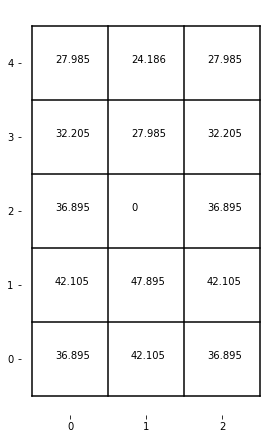

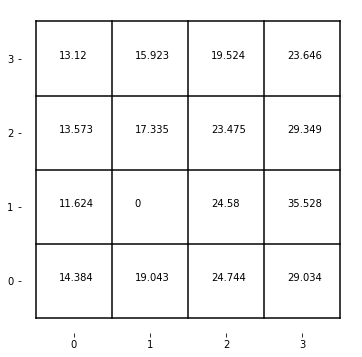

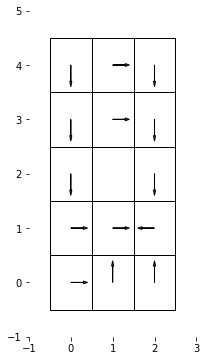

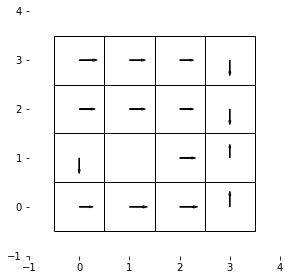

In [24]:
"""
Class: Stat232C
Project 2: Value Iteration
Name: Mingjia Yao
Date: April 2020

"""
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import copy

class ValueIteration(object):
    def __init__(self, transitionTable, rewardTable, valueTable, convergenceTolerance, gamma):
        self.transitionTable = transitionTable
        self.rewardTable  = rewardTable
        self.valueTable = valueTable
        self.convergenceTolerance = convergenceTolerance
        self.gamma = gamma

    def __call__(self):
        ValueTable=self.valueTable
        tempValueTable=copy.copy(ValueTable)
        delta=1
        while delta >= self.convergenceTolerance:
            delta=0
            for s in ValueTable:
                v=ValueTable[s]
                lib_s=self.transitionTable[s]
                max_a =0
                for a in lib_s:
                    sum_sr=0
                    lib_a=lib_s[a]
                    for ns in lib_a:
                        sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*tempValueTable[ns])
                    max_a=max(max_a,sum_sr)
                ValueTable[s]=max_a
                delta=max(delta,abs(v-ValueTable[s]))
            tempValueTable=copy.copy(ValueTable)
        policyTable={}
        for s in ValueTable:
            lib_s=self.transitionTable[s]
            pi_s=(0,0)
            vs=0
            prob_ns=0
            for a in lib_s:
                sum_sr=0
                lib_a=lib_s[a]
                for ns in lib_a:
                    sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*ValueTable[ns])
                if sum_sr>vs:
                    pi_s=a
                    vs=sum_sr
                    pi_ns=(0,0)
                    v_ns=0
                    for ns in lib_a:
                        if ValueTable[ns]>v_ns:
                            pi_ns=ns
                            v_ns=ValueTable[ns]
                            prob_ns=lib_a[ns]
            policyTable[s]={pi_s:prob_ns}
            
        return ([ValueTable, policyTable])


def viewDictionaryStructure(d, levels, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(levels[indent]) + ": "+ str(key))
        if isinstance(value, dict):
            viewDictionaryStructure(value, levels, indent+1)
        else:
            print('\t' * (indent+1) + str(levels[indent+1])+ ": " + str(value))

def visualizeValueTable(gridWidth, gridHeight,  valueTable, goalState=None, trapStates=None):
    gridAdjust = .5
    gridScale = 1.5

    xs = np.linspace(-gridAdjust, gridWidth - gridAdjust, gridWidth + 1)
    ys = np.linspace(-gridAdjust, gridHeight - gridAdjust, gridHeight + 1)

    plt.rcParams["figure.figsize"] = [gridWidth * gridScale, gridHeight * gridScale]
    ax = plt.gca(frameon=False, xticks=range(gridWidth), yticks=range(gridHeight))

    # goal and trap coloring
    if goalState:
        ax.add_patch(Rectangle((goalState[0] - gridAdjust, goalState[1] - gridAdjust), 1, 1, fill=True, color='green', alpha=.1))

    if trapStates:
        for (trapx, trapy) in trapStates: ax.add_patch(Rectangle((trapx - gridAdjust, trapy - gridAdjust), 1, 1, fill=True, color='red', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color="black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color="black")

    # labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex - .2, statey, str(round(val, 3)))

    plt.show()


def visualizePolicy(states, policy, trueGoalState=None, otherGoals=None, trapStates=None, arrowScale=.3):
    # grid height/width
    gridAdjust = .5
    gridScale = 1.5

    minimumx, minimumy = [min(coord) for coord in zip(*states)]
    maximumx, maximumy = [max(coord) for coord in zip(*states)]

    plt.rcParams["figure.figsize"] = [(maximumx - minimumx) * gridScale, (maximumy - minimumy) * gridScale]
    ax = plt.gca(frameon=False, xticks=range(minimumx - 1, maximumx + 2), yticks=range(minimumy - 1, maximumy + 2))

    # gridline drawing
    for (statex, statey) in states:
        ax.add_patch(Rectangle((statex - gridAdjust, statey - gridAdjust), 1, 1, fill=False, color='black', alpha=1))

    # goal and trap coloring
    if trueGoalState:
        ax.add_patch(Rectangle((trueGoalState[0] - gridAdjust, trueGoalState[1] - gridAdjust), 1, 1, fill=True, color='green',alpha=.5))
    if otherGoals:
        for (goalx, goaly) in otherGoals:ax.add_patch(Rectangle((goalx - gridAdjust, goaly - gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    if trapStates:
        for (trapx, trapy) in trapStates:ax.add_patch(Rectangle((trapx - gridAdjust, trapy - gridAdjust), 1, 1, fill=True, color='red', alpha=.1))

    # labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX * actionProb * arrowScale,
                      optimalActionY * actionProb * arrowScale, head_width=0.05 * actionProb,
                      head_length=0.1 * actionProb)
    plt.show()

def main():

    """
	Example 1: Deterministic Transition
	When transitions are deterministic, the optimal policy is always to take the action or actions that move you closer to the goal state while avoiding the trap.

	"""
	    
    transitionTableDet = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1}},(2, 0): {(1, 0): {(2, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(2, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1}},(2, 2): {(1, 0): {(2, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1}},(2, 3): {(1, 0): {(2, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1}},(2, 4): {(1, 0): {(2, 4): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1}}}
    rewardTableDet = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): 10},(0, 1): {(1, 2): 10},(-1, 0): {(0, 1): 10},(0, -1): {(1, 0): 10}},(1, 2): {(1, 0): {(2, 2): -100},(0, 1): {(1, 3): -100},(-1, 0): {(0, 2): -100},(0, -1): {(1, 1): -100}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1}},(2, 0): {(1, 0): {(2, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(2, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1}},(2, 2): {(1, 0): {(2, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1}},(2, 3): {(1, 0): {(2, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1}},(2, 4): {(1, 0): {(2, 4): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1}}}
    valueTableDet = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(0, 4): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(1, 4): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(2, 4): 0}
    convergenceTolerance = 10e-7
    gamma = .9
    performValueIteration = ValueIteration(transitionTableDet, rewardTableDet, valueTableDet, convergenceTolerance, gamma)
    optimalValuesDet, policyTableDet = performValueIteration()
    print('optimalValuesDet: {}'.format(optimalValuesDet))
    print('policyTableDet: {}'.format(policyTableDet))


    """
	Example 2: Probabilistic Transition

	"""
    transitionTableProb = {(0, 0): {(1, 0): {(1, 0): 0.7, (0, 1): 0.2, (0, 0): 0.1},(0, 1): {(0, 1): 0.7999999999999999, (1, 0): 0.2},(-1, 0): {(0, 0): 0.7, (1, 0): 0.2, (0, 1): 0.1},(0, -1): {(0, 0): 0.7, (1, 0): 0.1, (0, 1): 0.2}},(0, 1): {(1, 0): {(1, 1): 0.7999999999999999, (0, 1): 0.1, (0, 2): 0.1},(0, 1): {(0, 2): 0.7999999999999999, (0, 0): 0.2},(-1, 0): {(0, 1): 0.8999999999999999, (0, 0): 0.1},(0, -1): {(0, 0): 0.7999999999999999, (0, 2): 0.1, (0, 1): 0.1}},(0, 2): {(1, 0): {(1, 2): 0.7999999999999999, (0, 1): 0.2},(0, 1): {(0, 3): 0.7999999999999999, (0, 1): 0.1, (1, 2): 0.1},(-1, 0): {(0, 2): 0.7, (0, 1): 0.1, (1, 2): 0.1, (0, 3): 0.1},(0, -1): {(0, 1): 0.8999999999999999, (0, 3): 0.1}},(0, 3): {(1, 0): {(1, 3): 0.8999999999999999, (0, 2): 0.1},(0, 1): {(0, 3): 0.9999999999999999},(-1, 0): {(0, 3): 0.7999999999999999, (0, 2): 0.1, (1, 3): 0.1},(0, -1): {(0, 2): 0.7999999999999999, (0, 3): 0.2}},(1, 0): {(1, 0): {(2, 0): 0.8999999999999999, (1, 1): 0.1},(0, 1): {(1, 1): 0.8999999999999999, (1, 0): 0.1},(-1, 0): {(0, 0): 0.7, (1, 1): 0.2, (2, 0): 0.1},(0, -1): {(1, 0): 0.7999999999999999, (0, 0): 0.2}},(1, 1): {(1, 0): {(2, 1): 0.7999999999999999, (1, 0): 0.1, (0, 1): 0.1},(0, 1): {(1, 2): 0.7, (2, 1): 0.30000000000000004},(-1, 0): {(0, 1): 0.7, (2, 1): 0.1, (1, 0): 0.2},(0, -1): {(1, 0): 0.7999999999999999, (0, 1): 0.1, (2, 1): 0.1}},(1, 2): {(1, 0): {(2, 2): 0.7999999999999999, (1, 3): 0.1, (1, 1): 0.1},(0, 1): {(1, 3): 0.8999999999999999, (2, 2): 0.1},(-1, 0): {(0, 2): 0.8999999999999999, (1, 1): 0.1},(0, -1): {(1, 1): 0.7999999999999999, (2, 2): 0.1, (0, 2): 0.1}},(1, 3): {(1, 0): {(2, 3): 0.7999999999999999, (1, 3): 0.2},(0, 1): {(1, 3): 0.7999999999999999, (2, 3): 0.1, (0, 3): 0.1},(-1, 0): {(0, 3): 0.7, (2, 3): 0.1, (1, 2): 0.2},(0, -1): {(1, 2): 0.7999999999999999, (0, 3): 0.2}},(2, 0): {(1, 0): {(3, 0): 0.8999999999999999, (2, 0): 0.1},(0, 1): {(2, 1): 0.7999999999999999, (3, 0): 0.1, (1, 0): 0.1},(-1, 0): {(1, 0): 0.7, (2, 0): 0.2, (2, 1): 0.1},(0, -1): {(2, 0): 0.7, (2, 1): 0.2, (1, 0): 0.1}},(2, 1): {(1, 0): {(3, 1): 0.7999999999999999, (1, 1): 0.2},(0, 1): {(2, 2): 0.7, (1, 1): 0.1, (3, 1): 0.2},(-1, 0): {(1, 1): 0.7, (2, 0): 0.1, (2, 2): 0.1, (3, 1): 0.1},(0, -1): {(2, 0): 0.7, (1, 1): 0.2, (3, 1): 0.1}},(2, 2): {(1, 0): {(3, 2): 0.7, (1, 2): 0.1, (2, 1): 0.2},(0, 1): {(2, 3): 0.7999999999999999, (2, 1): 0.2},(-1, 0): {(1, 2): 0.7999999999999999, (2, 1): 0.1, (3, 2): 0.1},(0, -1): {(2, 1): 0.7999999999999999, (1, 2): 0.1, (3, 2): 0.1}},(2, 3): {(1, 0): {(3, 3): 0.7, (2, 3): 0.2, (2, 2): 0.1},(0, 1): {(2, 3): 0.7999999999999999, (2, 2): 0.1, (3, 3): 0.1},(-1, 0): {(1, 3): 0.8999999999999999, (2, 3): 0.1},(0, -1): {(2, 2): 0.7, (3, 3): 0.1, (1, 3): 0.1, (2, 3): 0.1}},(3, 0): {(1, 0): {(3, 0): 0.7, (3, 1): 0.1, (2, 0): 0.2},(0, 1): {(3, 1): 0.7999999999999999, (2, 0): 0.2},(-1, 0): {(2, 0): 0.7999999999999999, (3, 0): 0.2},(0, -1): {(3, 0): 0.7999999999999999, (2, 0): 0.1, (3, 1): 0.1}},(3, 1): {(1, 0): {(3, 1): 0.8999999999999999, (3, 2): 0.1},(0, 1): {(3, 2): 0.7, (2, 1): 0.2, (3, 0): 0.1},(-1, 0): {(2, 1): 0.7999999999999999, (3, 0): 0.1, (3, 1): 0.1},(0, -1): {(3, 0): 0.7999999999999999, (2, 1): 0.2}},(3, 2): {(1, 0): {(3, 2): 0.7999999999999999, (3, 1): 0.1, (2, 2): 0.1},(0, 1): {(3, 3): 0.7, (3, 2): 0.2, (2, 2): 0.1},(-1, 0): {(2, 2): 0.9999999999999999},(0, -1): {(3, 1): 0.7999999999999999, (3, 3): 0.1, (3, 2): 0.1}},(3, 3): {(1, 0): {(3, 3): 0.7999999999999999, (3, 2): 0.2},(0, 1): {(3, 3): 0.7999999999999999, (3, 2): 0.2},(-1, 0): {(2, 3): 0.7999999999999999, (3, 2): 0.1, (3, 3): 0.1},(0, -1): {(3, 2): 0.7999999999999999, (2, 3): 0.2}}}
    rewardTableProb = {(0, 0): {(1, 0): {(1, 0): -1, (0, 1): -1, (0, 0): -1},(0, 1): {(0, 1): -1, (1, 0): -1},(-1, 0): {(0, 0): -1, (1, 0): -1, (0, 1): -1},(0, -1): {(0, 0): -1, (1, 0): -1, (0, 1): -1}},(0, 1): {(1, 0): {(1, 1): -1, (0, 1): -1, (0, 2): -1},(0, 1): {(0, 2): -1, (0, 0): -1},(-1, 0): {(0, 1): -1, (0, 0): -1},(0, -1): {(0, 0): -1, (0, 2): -1, (0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1, (0, 1): -1},(0, 1): {(0, 3): -1, (0, 1): -1, (1, 2): -1},(-1, 0): {(0, 2): -1, (0, 1): -1, (1, 2): -1, (0, 3): -1},(0, -1): {(0, 1): -1, (0, 3): -1}},(0, 3): {(1, 0): {(1, 3): -1, (0, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 3): -1, (0, 2): -1, (1, 3): -1},(0, -1): {(0, 2): -1, (0, 3): -1}},(1, 0): {(1, 0): {(2, 0): -1, (1, 1): -1},(0, 1): {(1, 1): -1, (1, 0): -1},(-1, 0): {(0, 0): -1, (1, 1): -1, (2, 0): -1},(0, -1): {(1, 0): -1, (0, 0): -1}},(1, 1): {(1, 0): {(2, 1): -100, (1, 0): -100, (0, 1): -100},(0, 1): {(1, 2): -100, (2, 1): -100},(-1, 0): {(0, 1): -100, (2, 1): -100, (1, 0): -100},(0, -1): {(1, 0): -100, (0, 1): -100, (2, 1): -100}},(1, 2): {(1, 0): {(2, 2): -1, (1, 3): -1, (1, 1): -1},(0, 1): {(1, 3): -1, (2, 2): -1},(-1, 0): {(0, 2): -1, (1, 1): -1},(0, -1): {(1, 1): -1, (2, 2): -1, (0, 2): -1}},(1, 3): {(1, 0): {(2, 3): -1, (1, 3): -1},(0, 1): {(1, 3): -1, (2, 3): -1, (0, 3): -1},(-1, 0): {(0, 3): -1, (2, 3): -1, (1, 2): -1},(0, -1): {(1, 2): -1, (0, 3): -1}},(2, 0): {(1, 0): {(3, 0): -1, (2, 0): -1},(0, 1): {(2, 1): -1, (3, 0): -1, (1, 0): -1},(-1, 0): {(1, 0): -1, (2, 0): -1, (2, 1): -1},(0, -1): {(2, 0): -1, (2, 1): -1, (1, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1, (1, 1): -1},(0, 1): {(2, 2): -1, (1, 1): -1, (3, 1): -1},(-1, 0): {(1, 1): -1, (2, 0): -1, (2, 2): -1, (3, 1): -1},(0, -1): {(2, 0): -1, (1, 1): -1, (3, 1): -1}},(2, 2): {(1, 0): {(3, 2): -1, (1, 2): -1, (2, 1): -1},(0, 1): {(2, 3): -1, (2, 1): -1},(-1, 0): {(1, 2): -1, (2, 1): -1, (3, 2): -1},(0, -1): {(2, 1): -1, (1, 2): -1, (3, 2): -1}},(2, 3): {(1, 0): {(3, 3): -1, (2, 3): -1, (2, 2): -1},(0, 1): {(2, 3): -1, (2, 2): -1, (3, 3): -1},(-1, 0): {(1, 3): -1, (2, 3): -1},(0, -1): {(2, 2): -1, (3, 3): -1, (1, 3): -1, (2, 3): -1}},(3, 0): {(1, 0): {(3, 0): -1, (3, 1): -1, (2, 0): -1},(0, 1): {(3, 1): -1, (2, 0): -1},(-1, 0): {(2, 0): -1, (3, 0): -1},(0, -1): {(3, 0): -1, (2, 0): -1, (3, 1): -1}},(3, 1): {(1, 0): {(3, 1): -1, (3, 2): 10},(0, 1): {(3, 2): 10, (2, 1): 10, (3, 0): 10},(-1, 0): {(2, 1): 10, (3, 0): 10, (3, 1): -1},(0, -1): {(3, 0): 10, (2, 1): 10}},(3, 2): {(1, 0): {(3, 2): -1, (3, 1): -1, (2, 2): -1},(0, 1): {(3, 3): -1, (3, 2): -1, (2, 2): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1, (3, 3): -1, (3, 2): -1}},(3, 3): {(1, 0): {(3, 3): -1, (3, 2): -1},(0, 1): {(3, 3): -1, (3, 2): -1},(-1, 0): {(2, 3): -1, (3, 2): -1, (3, 3): -1},(0, -1): {(3, 2): -1, (2, 3): -1}}}
    valueTableProb = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(3, 0): 0,(3, 1): 0,(3, 2): 0,(3, 3): 0}
    convergenceTolerance = 10e-7
    gamma = .9

    performValueIteration = ValueIteration(transitionTableProb, rewardTableProb, valueTableProb, convergenceTolerance, gamma)
    optimalValuesProb, policyTableProb = performValueIteration()
    print('optimalValuesProb: {}'.format(optimalValuesProb))
    print('policyTableProb: {}'.format(policyTableProb))


    """
    Visualization Tools

	Uncomment to view transition or reward structure in a readable format

	"""

    levelsReward  = ["state", "action", "next state", "reward"]
    levelsTransition  = ["state", "action", "next state", "probability"]
    #
    # viewDictionaryStructure(transitionTableDet, levelsTransition)
    # viewDictionaryStructure(rewardTableDet, levelsReward)
    #
    # viewDictionaryStructure(transitionTableProb, levelsTransition)
    # viewDictionaryStructure(rewardTableProb, levelsReward)

    visualizeValueTable(gridWidth=3, gridHeight=5, valueTable=optimalValuesDet)
    visualizeValueTable(gridWidth=4, gridHeight=4, valueTable=optimalValuesProb)
    visualizePolicy(states=optimalValuesDet.keys(), policy=policyTableDet)
    visualizePolicy(states=optimalValuesProb.keys(), policy=policyTableProb)



if __name__ == '__main__':
    main()


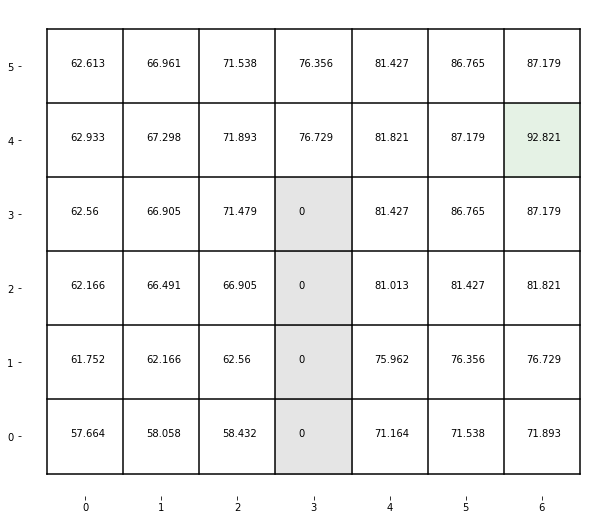

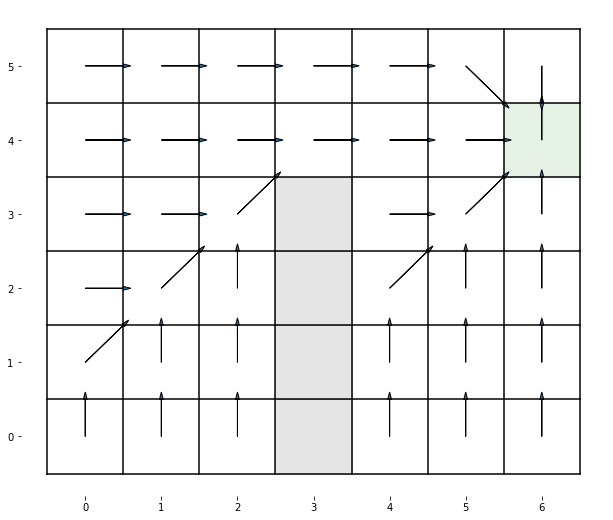

[3.1379882404511474, 10.083985411991591, 33.08324092956145, 110.93174740658924, 379.8297746257766, 1324.9363289419246, 4705.747517484912]


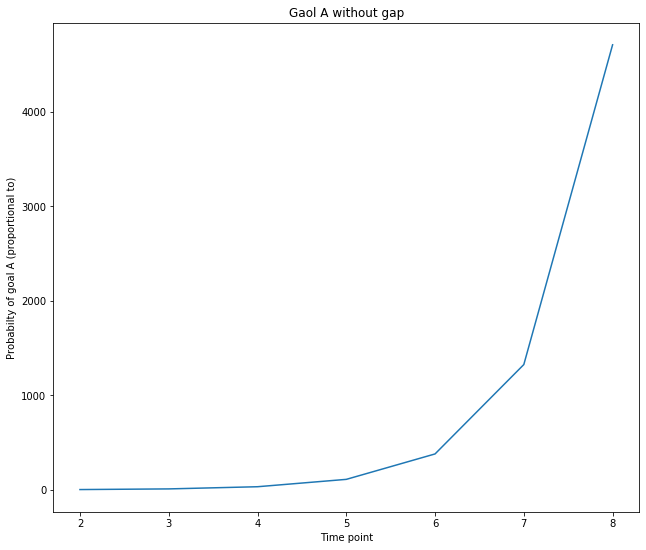

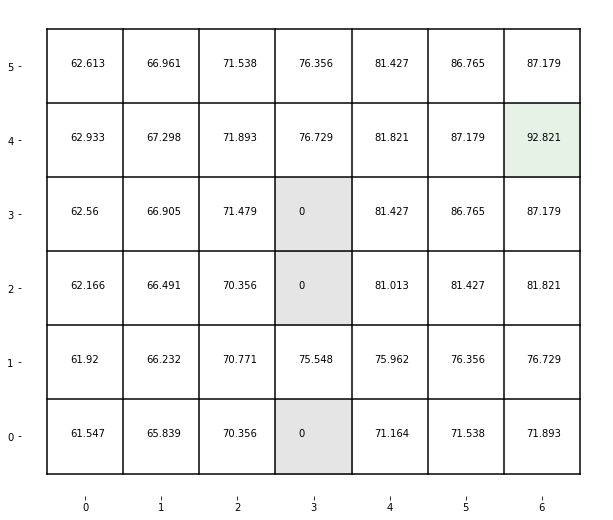

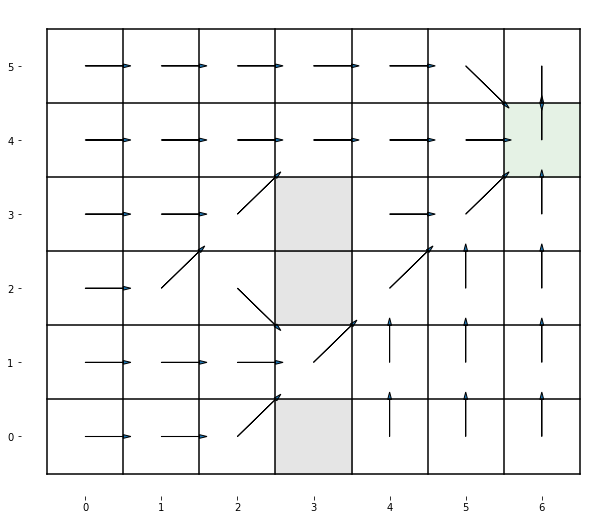

[3.202847205891906, 10.292411021839404, 33.76703786432827, 113.22459451024147, 387.6804756342923, 1352.321443187641, 4803.010667872254]


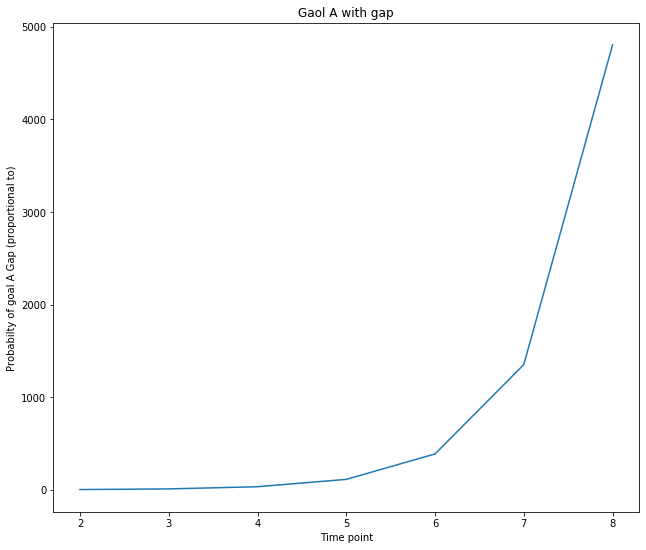

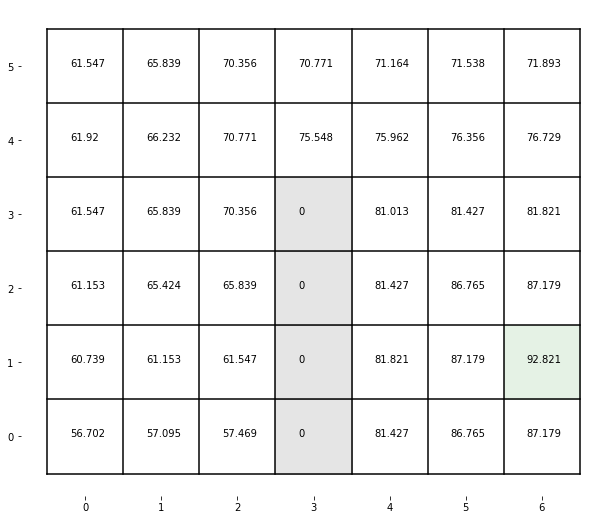

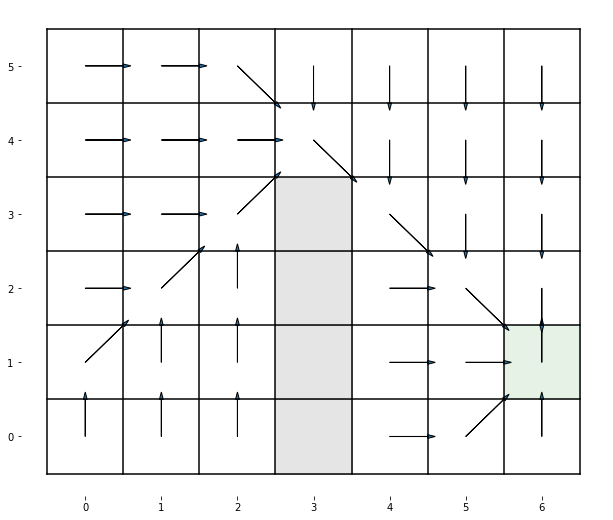

[3.121152038274025, 9.977545074384132, 32.63569334856427, 108.91450966094524, 371.23255919461366, 1291.2642534958634, 4580.00537153257]


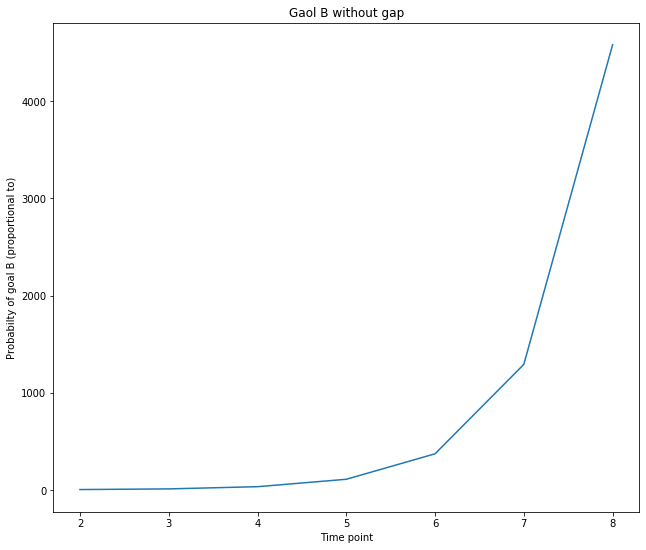

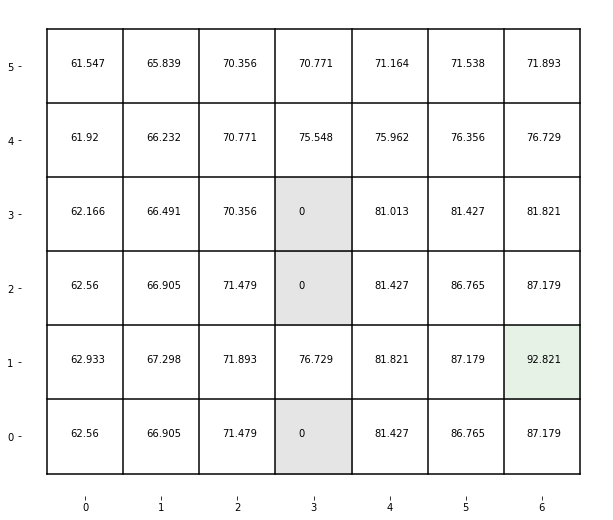

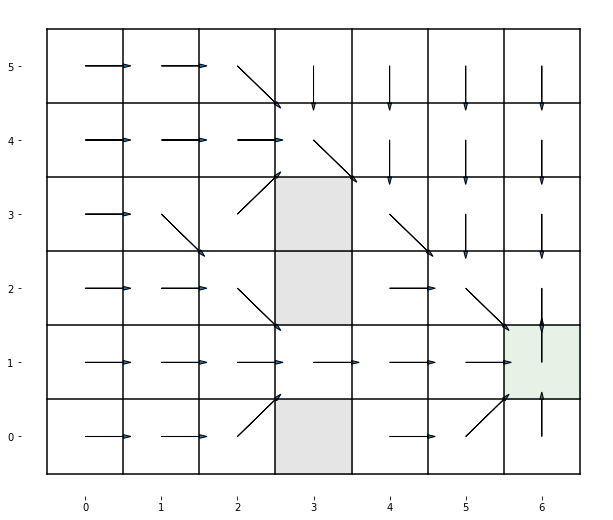

[3.2191833585636265, 10.561401585077677, 34.54543812744511, 115.28786758588984, 392.95600308938873, 1366.8252737102025, 4848.013960926132]


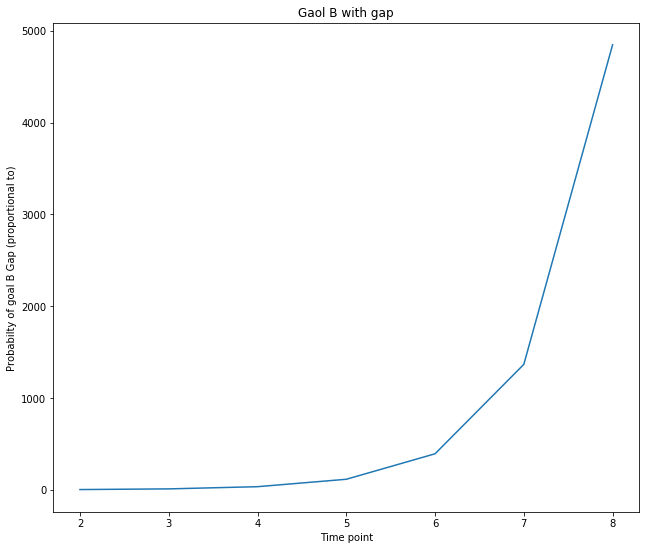

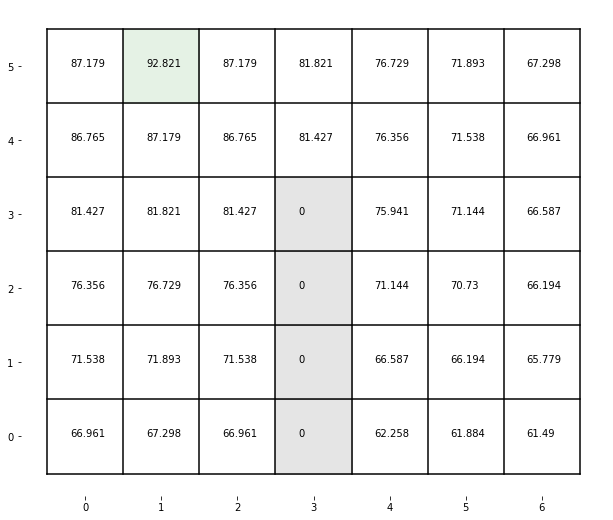

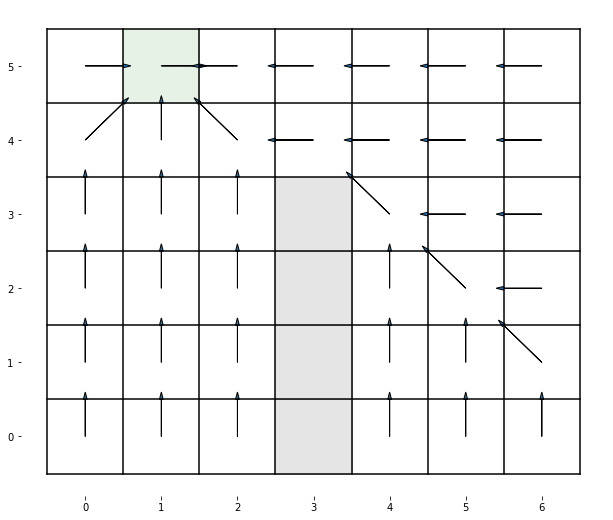

[3.287819241259324, 11.024419686967674, 37.74756052223363, 131.67244248182197, 467.6581480148082]


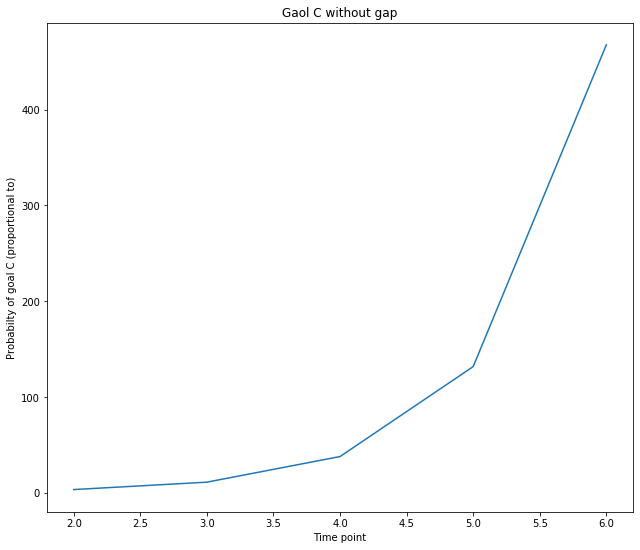

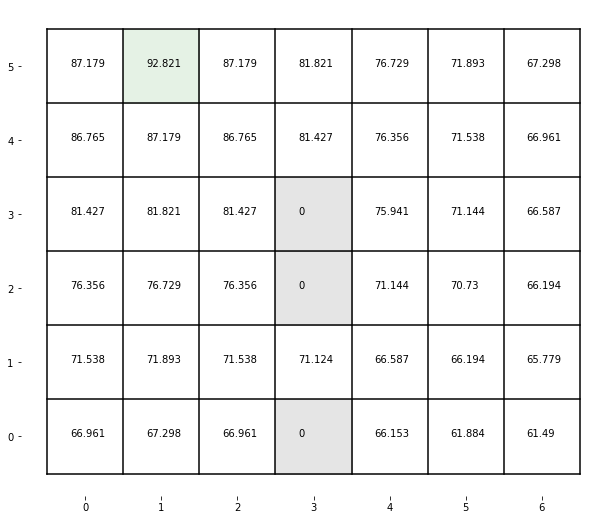

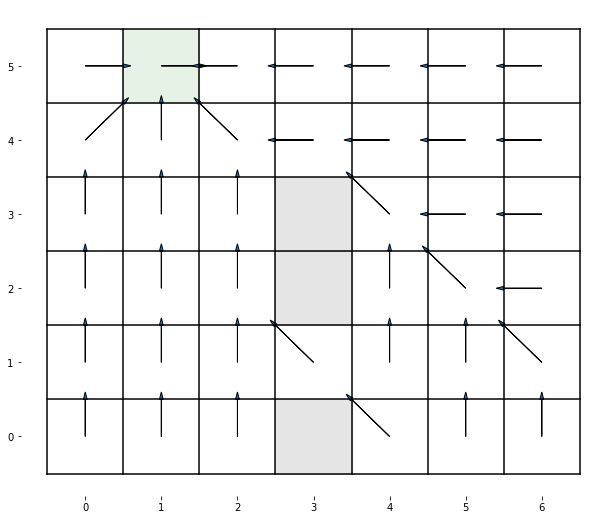

[3.287819253742368, 11.024419805821687, 37.7475610492872, 131.6724450925809, 467.658158549859]


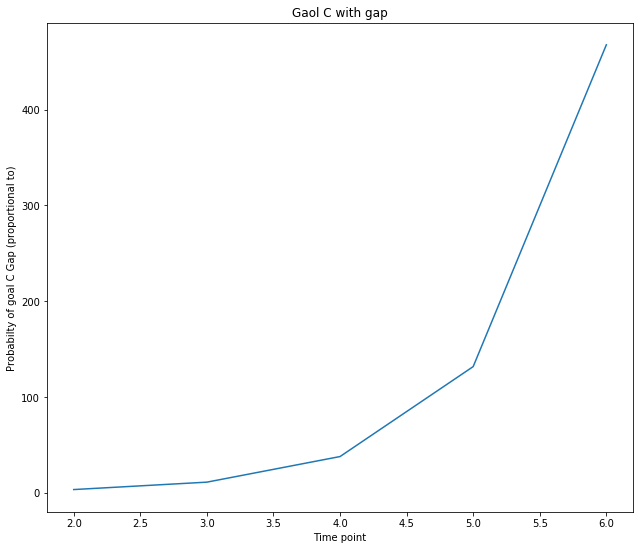

In [77]:
"""
Class: Stat232C
Project 3: Goal Inference
Name:Mingjia Yao
Date: May, 2020

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy
import math

class ValueIteration(object):
    def __init__(self, transitionTable, rewardTable, valueTable, convergenceTolerance, gamma):
        self.transitionTable = transitionTable
        self.rewardTable  = rewardTable
        self.valueTable = valueTable
        self.convergenceTolerance = convergenceTolerance
        self.gamma = gamma

    def __call__(self):
        ValueTable=self.valueTable
        tempValueTable=copy.copy(ValueTable)
        delta=1
        while delta >= self.convergenceTolerance:
            delta=0
            for s in ValueTable:
                v=ValueTable[s]
                lib_s=self.transitionTable[s]
                max_a =0
                for a in lib_s:
                    sum_sr=0
                    lib_a=lib_s[a]
                    for ns in lib_a:
                        sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*tempValueTable[ns])
                    max_a=max(max_a,sum_sr)
                ValueTable[s]=max_a
                delta=max(delta,abs(v-ValueTable[s]))
            tempValueTable=copy.copy(ValueTable)
        policyTable={}
        for s in ValueTable:
            lib_s=self.transitionTable[s]
            pi_s=(0,0)
            vs=0
            prob_ns=0
            for a in lib_s:
                sum_sr=0
                lib_a=lib_s[a]
                for ns in lib_a:
                    sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*ValueTable[ns])
                if sum_sr>vs:
                    pi_s=a
                    vs=sum_sr
                    pi_ns=(0,0)
                    v_ns=0
                    for ns in lib_a:
                        if ValueTable[ns]>v_ns:
                            pi_ns=ns
                            v_ns=ValueTable[ns]
                            prob_ns=lib_a[ns]
            policyTable[s]={pi_s:prob_ns}
            
        return ([ValueTable, policyTable])


def visualizeValueTable(gridWidth, gridHeight, goalState, trapStates, valueTable):
    gridAdjust = .5
    gridScale = 1.5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()


def visualizePolicy(gridWidth, gridHeight, goalState, trapStates, policy):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()


def viewDictionaryStructure(d, levels, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(levels[indent]) + ": "+ str(key))
        if isinstance(value, dict):
            viewDictionaryStructure(value, levels, indent+1)
        else:
            print('\t' * (indent+1) + str(levels[indent+1])+ ": " + str(value))

def p_traj(traj,beta,gamma,transitTable,rewardTable,valueTable):
    p=1
    ret=[]
    for i in range(len(traj)-1):
        p=p*p_stn_st(traj[i],traj[i+1],beta,gamma,transitTable,rewardTable,valueTable)
        ret=ret+[p]
    return ret

def p_stn_st(st,stn,beta,gamma,transitTable,rewardTable,valueTable):
    lib_s=transitTable[st]
    p=0
    for at in lib_s:
        if stn in lib_s[at]:
            p=p+lib_s[at][stn]*pias(st,at,beta,gamma,transitTable,rewardTable,valueTable)
    return p

def pias(st,at,beta,gamma,transitTable,rewardTable,valueTable):
    return math.log(beta*q(st,at,gamma,transitTable,rewardTable,valueTable))

def q(st,at,gamma,transitTable,rewardTable,valueTable):
    lib_sa=transitTable[st][at]
    q=0
    for ns in lib_sa:
        q=q+lib_sa[ns]*(rewardTable[st][at][ns]+gamma*valueTable[ns])
    return q

def main():
    gamma = .95
    beta = .4
    convergenceTolerance = 10e-7
    transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 0): 1},(1, -1): {(0, 0): 1},(1, 1): {(1, 1): 1},(-1, -1): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(1, 2): 1},(-1, -1): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(-1, 1): {(0, 2): 1},(1, -1): {(1, 1): 1},(1, 1): {(1, 3): 1},(-1, -1): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(-1, 1): {(0, 3): 1},(1, -1): {(1, 2): 1},(1, 1): {(1, 4): 1},(-1, -1): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(-1, 1): {(0, 4): 1},(1, -1): {(1, 3): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(-1, 1): {(0, 5): 1},(1, -1): {(1, 4): 1},(1, 1): {(0, 5): 1},(-1, -1): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 1): 1},(1, -1): {(1, 0): 1},(1, 1): {(2, 1): 1},(-1, -1): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(-1, 1): {(0, 2): 1},(1, -1): {(2, 0): 1},(1, 1): {(2, 2): 1},(-1, -1): {(0, 0): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(-1, 1): {(0, 3): 1},(1, -1): {(2, 1): 1},(1, 1): {(2, 3): 1},(-1, -1): {(0, 1): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(-1, 1): {(0, 4): 1},(1, -1): {(2, 2): 1},(1, 1): {(2, 4): 1},(-1, -1): {(0, 2): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(-1, 1): {(0, 5): 1},(1, -1): {(2, 3): 1},(1, 1): {(2, 5): 1},(-1, -1): {(0, 3): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(-1, 1): {(1, 5): 1},(1, -1): {(2, 4): 1},(1, 1): {(1, 5): 1},(-1, -1): {(0, 4): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 1): 1},(1, -1): {(2, 0): 1},(1, 1): {(3, 1): 1},(-1, -1): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(-1, 1): {(1, 2): 1},(1, -1): {(3, 0): 1},(1, 1): {(3, 2): 1},(-1, -1): {(1, 0): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(-1, 1): {(1, 3): 1},(1, -1): {(3, 1): 1},(1, 1): {(3, 3): 1},(-1, -1): {(1, 1): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(-1, 1): {(1, 4): 1},(1, -1): {(3, 2): 1},(1, 1): {(3, 4): 1},(-1, -1): {(1, 2): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(-1, 1): {(1, 5): 1},(1, -1): {(3, 3): 1},(1, 1): {(3, 5): 1},(-1, -1): {(1, 3): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(-1, 1): {(2, 5): 1},(1, -1): {(3, 4): 1},(1, 1): {(2, 5): 1},(-1, -1): {(1, 4): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 1): 1},(1, -1): {(3, 0): 1},(1, 1): {(4, 1): 1},(-1, -1): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(-1, 1): {(2, 2): 1},(1, -1): {(4, 0): 1},(1, 1): {(4, 2): 1},(-1, -1): {(2, 0): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(-1, 1): {(2, 3): 1},(1, -1): {(4, 1): 1},(1, 1): {(4, 3): 1},(-1, -1): {(2, 1): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(-1, 1): {(2, 4): 1},(1, -1): {(4, 2): 1},(1, 1): {(4, 4): 1},(-1, -1): {(2, 2): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(-1, 1): {(2, 5): 1},(1, -1): {(4, 3): 1},(1, 1): {(4, 5): 1},(-1, -1): {(2, 3): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(-1, 1): {(3, 5): 1},(1, -1): {(4, 4): 1},(1, 1): {(3, 5): 1},(-1, -1): {(2, 4): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 1): 1},(1, -1): {(4, 0): 1},(1, 1): {(5, 1): 1},(-1, -1): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(-1, 1): {(3, 2): 1},(1, -1): {(5, 0): 1},(1, 1): {(5, 2): 1},(-1, -1): {(3, 0): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(-1, 1): {(3, 3): 1},(1, -1): {(5, 1): 1},(1, 1): {(5, 3): 1},(-1, -1): {(3, 1): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(-1, 1): {(3, 4): 1},(1, -1): {(5, 2): 1},(1, 1): {(5, 4): 1},(-1, -1): {(3, 2): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(-1, 1): {(3, 5): 1},(1, -1): {(5, 3): 1},(1, 1): {(5, 5): 1},(-1, -1): {(3, 3): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(-1, 1): {(4, 5): 1},(1, -1): {(5, 4): 1},(1, 1): {(4, 5): 1},(-1, -1): {(3, 4): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 1): 1},(1, -1): {(5, 0): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(-1, 1): {(4, 2): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 2): 1},(-1, -1): {(4, 0): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(-1, 1): {(4, 3): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 3): 1},(-1, -1): {(4, 1): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(-1, 1): {(4, 4): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 4): 1},(-1, -1): {(4, 2): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(-1, 1): {(4, 5): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 5): 1},(-1, -1): {(4, 3): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(5, 5): 1},(-1, -1): {(4, 4): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 1): 1},(1, -1): {(6, 0): 1},(1, 1): {(6, 0): 1},(-1, -1): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(-1, 1): {(5, 2): 1},(1, -1): {(6, 1): 1},(1, 1): {(6, 1): 1},(-1, -1): {(5, 0): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(-1, 1): {(5, 3): 1},(1, -1): {(6, 2): 1},(1, 1): {(6, 2): 1},(-1, -1): {(5, 1): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(-1, 1): {(5, 4): 1},(1, -1): {(6, 3): 1},(1, 1): {(6, 3): 1},(-1, -1): {(5, 2): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(-1, 1): {(5, 5): 1},(1, -1): {(6, 4): 1},(1, 1): {(6, 4): 1},(-1, -1): {(5, 3): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(-1, 1): {(6, 5): 1},(1, -1): {(6, 5): 1},(1, 1): {(6, 5): 1},(-1, -1): {(5, 4): 1}}}
    valueTable = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(0, 4): 0,(0, 5): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(1, 4): 0,(1, 5): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(2, 4): 0,(2, 5): 0,(3, 0): 0,(3, 1): 0,(3, 2): 0,(3, 3): 0,(3, 4): 0,(3, 5): 0,(4, 0): 0,(4, 1): 0,(4, 2): 0,(4, 3): 0,(4, 4): 0,(4, 5): 0,(5, 0): 0,(5, 1): 0,(5, 2): 0,(5, 3): 0,(5, 4): 0,(5, 5): 0,(6, 0): 0,(6, 1): 0,(6, 2): 0,(6, 3): 0,(6, 4): 0,(6, 5): 0}
    
    #Observed Trajectories
    trajectoryToGoalA = [(0,0), (1,1), (1,2), (2,3), (3,4), (4,4), (5,4), (6,4)]
    trajectoryToGoalB = [(0,0), (1,1), (2,2), (2,3), (3,4), (4,3), (5,2), (6,1)]
    trajectoryToGoalC = [(0,0), (0,1), (1,2), (1,3), (1,4), (1,5)]

    #Environment 1: Solid  Barrier
    rewardA = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardB = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardC = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 2): -100},(1, -1): {(4, 0): -100},(1, 1): {(4, 2): -100},(-1, -1): {(2, 0): -100}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    
    #Environment 2: Barrier with a Gap
    rewardAGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): 10},(-1, 0): {(5, 4): 10},(0, -1): {(6, 3): 10},(-1, 1): {(5, 5): 10},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): 10}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardBGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): -1.0},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1.0},(0, -1): {(1, 4): -1.0},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): -1.4142135623730951},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): -1.4142135623730951}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): 10},(-1, 0): {(5, 1): 10},(0, -1): {(6, 0): 10},(-1, 1): {(5, 2): 10},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): 10}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    rewardCGap = {(0, 0): {(1, 0): {(1, 0): -1.0},(0, 1): {(0, 1): -1.0},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(-1, 1): {(0, 0): -1},(1, -1): {(0, 0): -1},(1, 1): {(1, 1): -1.4142135623730951},(-1, -1): {(0, 0): -1}},(0, 1): {(1, 0): {(1, 1): -1.0},(0, 1): {(0, 2): -1.0},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1.0},(-1, 1): {(0, 1): -1},(1, -1): {(1, 0): -1.4142135623730951},(1, 1): {(1, 2): -1.4142135623730951},(-1, -1): {(0, 1): -1}},(0, 2): {(1, 0): {(1, 2): -1.0},(0, 1): {(0, 3): -1.0},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1.0},(-1, 1): {(0, 2): -1},(1, -1): {(1, 1): -1.4142135623730951},(1, 1): {(1, 3): -1.4142135623730951},(-1, -1): {(0, 2): -1}},(0, 3): {(1, 0): {(1, 3): -1.0},(0, 1): {(0, 4): -1.0},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1.0},(-1, 1): {(0, 3): -1},(1, -1): {(1, 2): -1.4142135623730951},(1, 1): {(1, 4): -1.4142135623730951},(-1, -1): {(0, 3): -1}},(0, 4): {(1, 0): {(1, 4): -1.0},(0, 1): {(0, 5): -1.0},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1.0},(-1, 1): {(0, 4): -1},(1, -1): {(1, 3): -1.4142135623730951},(1, 1): {(1, 5): -1.4142135623730951},(-1, -1): {(0, 4): -1}},(0, 5): {(1, 0): {(1, 5): -1.0},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1.0},(-1, 1): {(0, 5): -1},(1, -1): {(1, 4): -1.4142135623730951},(1, 1): {(0, 5): -1},(-1, -1): {(0, 5): -1}},(1, 0): {(1, 0): {(2, 0): -1.0},(0, 1): {(1, 1): -1.0},(-1, 0): {(0, 0): -1.0},(0, -1): {(1, 0): -1},(-1, 1): {(0, 1): -1.4142135623730951},(1, -1): {(1, 0): -1},(1, 1): {(2, 1): -1.4142135623730951},(-1, -1): {(1, 0): -1}},(1, 1): {(1, 0): {(2, 1): -1.0},(0, 1): {(1, 2): -1.0},(-1, 0): {(0, 1): -1.0},(0, -1): {(1, 0): -1.0},(-1, 1): {(0, 2): -1.4142135623730951},(1, -1): {(2, 0): -1.4142135623730951},(1, 1): {(2, 2): -1.4142135623730951},(-1, -1): {(0, 0): -1.4142135623730951}},(1, 2): {(1, 0): {(2, 2): -1.0},(0, 1): {(1, 3): -1.0},(-1, 0): {(0, 2): -1.0},(0, -1): {(1, 1): -1.0},(-1, 1): {(0, 3): -1.4142135623730951},(1, -1): {(2, 1): -1.4142135623730951},(1, 1): {(2, 3): -1.4142135623730951},(-1, -1): {(0, 1): -1.4142135623730951}},(1, 3): {(1, 0): {(2, 3): -1.0},(0, 1): {(1, 4): -1.0},(-1, 0): {(0, 3): -1.0},(0, -1): {(1, 2): -1.0},(-1, 1): {(0, 4): -1.4142135623730951},(1, -1): {(2, 2): -1.4142135623730951},(1, 1): {(2, 4): -1.4142135623730951},(-1, -1): {(0, 2): -1.4142135623730951}},(1, 4): {(1, 0): {(2, 4): -1.0},(0, 1): {(1, 5): -1.0},(-1, 0): {(0, 4): -1.0},(0, -1): {(1, 3): -1.0},(-1, 1): {(0, 5): -1.4142135623730951},(1, -1): {(2, 3): -1.4142135623730951},(1, 1): {(2, 5): -1.4142135623730951},(-1, -1): {(0, 3): -1.4142135623730951}},(1, 5): {(1, 0): {(2, 5): 10},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): 10},(0, -1): {(1, 4): 10},(-1, 1): {(1, 5): -1},(1, -1): {(2, 4): 10},(1, 1): {(1, 5): -1},(-1, -1): {(0, 4): 10}},(2, 0): {(1, 0): {(3, 0): -1.0},(0, 1): {(2, 1): -1.0},(-1, 0): {(1, 0): -1.0},(0, -1): {(2, 0): -1},(-1, 1): {(1, 1): -1.4142135623730951},(1, -1): {(2, 0): -1},(1, 1): {(3, 1): -1.4142135623730951},(-1, -1): {(2, 0): -1}},(2, 1): {(1, 0): {(3, 1): -1.0},(0, 1): {(2, 2): -1.0},(-1, 0): {(1, 1): -1.0},(0, -1): {(2, 0): -1.0},(-1, 1): {(1, 2): -1.4142135623730951},(1, -1): {(3, 0): -1.4142135623730951},(1, 1): {(3, 2): -1.4142135623730951},(-1, -1): {(1, 0): -1.4142135623730951}},(2, 2): {(1, 0): {(3, 2): -1.0},(0, 1): {(2, 3): -1.0},(-1, 0): {(1, 2): -1.0},(0, -1): {(2, 1): -1.0},(-1, 1): {(1, 3): -1.4142135623730951},(1, -1): {(3, 1): -1.4142135623730951},(1, 1): {(3, 3): -1.4142135623730951},(-1, -1): {(1, 1): -1.4142135623730951}},(2, 3): {(1, 0): {(3, 3): -1.0},(0, 1): {(2, 4): -1.0},(-1, 0): {(1, 3): -1.0},(0, -1): {(2, 2): -1.0},(-1, 1): {(1, 4): -1.4142135623730951},(1, -1): {(3, 2): -1.4142135623730951},(1, 1): {(3, 4): -1.4142135623730951},(-1, -1): {(1, 2): -1.4142135623730951}},(2, 4): {(1, 0): {(3, 4): -1.0},(0, 1): {(2, 5): -1.0},(-1, 0): {(1, 4): -1.0},(0, -1): {(2, 3): -1.0},(-1, 1): {(1, 5): -1.4142135623730951},(1, -1): {(3, 3): -1.4142135623730951},(1, 1): {(3, 5): -1.4142135623730951},(-1, -1): {(1, 3): -1.4142135623730951}},(2, 5): {(1, 0): {(3, 5): -1.0},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1.0},(0, -1): {(2, 4): -1.0},(-1, 1): {(2, 5): -1},(1, -1): {(3, 4): -1.4142135623730951},(1, 1): {(2, 5): -1},(-1, -1): {(1, 4): -1.4142135623730951}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(-1, 1): {(2, 1): -100},(1, -1): {(3, 0): -100},(1, 1): {(4, 1): -100},(-1, -1): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -1.0},(0, 1): {(3, 2): -1.0},(-1, 0): {(2, 1): -1.0},(0, -1): {(3, 0): -1.0},(-1, 1): {(2, 2): -1.4142135623730951},(1, -1): {(4, 0): -1.4142135623730951},(1, 1): {(4, 2): -1.4142135623730951},(-1, -1): {(2, 0): -1.4142135623730951}},(3, 2): {(1, 0): {(4, 2): -100},(0, 1): {(3, 3): -100},(-1, 0): {(2, 2): -100},(0, -1): {(3, 1): -100},(-1, 1): {(2, 3): -100},(1, -1): {(4, 1): -100},(1, 1): {(4, 3): -100},(-1, -1): {(2, 1): -100}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(-1, 1): {(2, 4): -100},(1, -1): {(4, 2): -100},(1, 1): {(4, 4): -100},(-1, -1): {(2, 2): -100}},(3, 4): {(1, 0): {(4, 4): -1.0},(0, 1): {(3, 5): -1.0},(-1, 0): {(2, 4): -1.0},(0, -1): {(3, 3): -1.0},(-1, 1): {(2, 5): -1.4142135623730951},(1, -1): {(4, 3): -1.4142135623730951},(1, 1): {(4, 5): -1.4142135623730951},(-1, -1): {(2, 3): -1.4142135623730951}},(3, 5): {(1, 0): {(4, 5): -1.0},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1.0},(0, -1): {(3, 4): -1.0},(-1, 1): {(3, 5): -1},(1, -1): {(4, 4): -1.4142135623730951},(1, 1): {(3, 5): -1},(-1, -1): {(2, 4): -1.4142135623730951}},(4, 0): {(1, 0): {(5, 0): -1.0},(0, 1): {(4, 1): -1.0},(-1, 0): {(3, 0): -1.0},(0, -1): {(4, 0): -1},(-1, 1): {(3, 1): -1.4142135623730951},(1, -1): {(4, 0): -1},(1, 1): {(5, 1): -1.4142135623730951},(-1, -1): {(4, 0): -1}},(4, 1): {(1, 0): {(5, 1): -1.0},(0, 1): {(4, 2): -1.0},(-1, 0): {(3, 1): -1.0},(0, -1): {(4, 0): -1.0},(-1, 1): {(3, 2): -1.4142135623730951},(1, -1): {(5, 0): -1.4142135623730951},(1, 1): {(5, 2): -1.4142135623730951},(-1, -1): {(3, 0): -1.4142135623730951}},(4, 2): {(1, 0): {(5, 2): -1.0},(0, 1): {(4, 3): -1.0},(-1, 0): {(3, 2): -1.0},(0, -1): {(4, 1): -1.0},(-1, 1): {(3, 3): -1.4142135623730951},(1, -1): {(5, 1): -1.4142135623730951},(1, 1): {(5, 3): -1.4142135623730951},(-1, -1): {(3, 1): -1.4142135623730951}},(4, 3): {(1, 0): {(5, 3): -1.0},(0, 1): {(4, 4): -1.0},(-1, 0): {(3, 3): -1.0},(0, -1): {(4, 2): -1.0},(-1, 1): {(3, 4): -1.4142135623730951},(1, -1): {(5, 2): -1.4142135623730951},(1, 1): {(5, 4): -1.4142135623730951},(-1, -1): {(3, 2): -1.4142135623730951}},(4, 4): {(1, 0): {(5, 4): -1.0},(0, 1): {(4, 5): -1.0},(-1, 0): {(3, 4): -1.0},(0, -1): {(4, 3): -1.0},(-1, 1): {(3, 5): -1.4142135623730951},(1, -1): {(5, 3): -1.4142135623730951},(1, 1): {(5, 5): -1.4142135623730951},(-1, -1): {(3, 3): -1.4142135623730951}},(4, 5): {(1, 0): {(5, 5): -1.0},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1.0},(0, -1): {(4, 4): -1.0},(-1, 1): {(4, 5): -1},(1, -1): {(5, 4): -1.4142135623730951},(1, 1): {(4, 5): -1},(-1, -1): {(3, 4): -1.4142135623730951}},(5, 0): {(1, 0): {(6, 0): -1.0},(0, 1): {(5, 1): -1.0},(-1, 0): {(4, 0): -1.0},(0, -1): {(5, 0): -1},(-1, 1): {(4, 1): -1.4142135623730951},(1, -1): {(5, 0): -1},(1, 1): {(6, 1): -1.4142135623730951},(-1, -1): {(5, 0): -1}},(5, 1): {(1, 0): {(6, 1): -1.0},(0, 1): {(5, 2): -1.0},(-1, 0): {(4, 1): -1.0},(0, -1): {(5, 0): -1.0},(-1, 1): {(4, 2): -1.4142135623730951},(1, -1): {(6, 0): -1.4142135623730951},(1, 1): {(6, 2): -1.4142135623730951},(-1, -1): {(4, 0): -1.4142135623730951}},(5, 2): {(1, 0): {(6, 2): -1.0},(0, 1): {(5, 3): -1.0},(-1, 0): {(4, 2): -1.0},(0, -1): {(5, 1): -1.0},(-1, 1): {(4, 3): -1.4142135623730951},(1, -1): {(6, 1): -1.4142135623730951},(1, 1): {(6, 3): -1.4142135623730951},(-1, -1): {(4, 1): -1.4142135623730951}},(5, 3): {(1, 0): {(6, 3): -1.0},(0, 1): {(5, 4): -1.0},(-1, 0): {(4, 3): -1.0},(0, -1): {(5, 2): -1.0},(-1, 1): {(4, 4): -1.4142135623730951},(1, -1): {(6, 2): -1.4142135623730951},(1, 1): {(6, 4): -1.4142135623730951},(-1, -1): {(4, 2): -1.4142135623730951}},(5, 4): {(1, 0): {(6, 4): -1.0},(0, 1): {(5, 5): -1.0},(-1, 0): {(4, 4): -1.0},(0, -1): {(5, 3): -1.0},(-1, 1): {(4, 5): -1.4142135623730951},(1, -1): {(6, 3): -1.4142135623730951},(1, 1): {(6, 5): -1.4142135623730951},(-1, -1): {(4, 3): -1.4142135623730951}},(5, 5): {(1, 0): {(6, 5): -1.0},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1.0},(0, -1): {(5, 4): -1.0},(-1, 1): {(5, 5): -1},(1, -1): {(6, 4): -1.4142135623730951},(1, 1): {(5, 5): -1},(-1, -1): {(4, 4): -1.4142135623730951}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1.0},(-1, 0): {(5, 0): -1.0},(0, -1): {(6, 0): -1},(-1, 1): {(5, 1): -1.4142135623730951},(1, -1): {(6, 0): -1},(1, 1): {(6, 0): -1},(-1, -1): {(6, 0): -1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1.0},(-1, 0): {(5, 1): -1.0},(0, -1): {(6, 0): -1.0},(-1, 1): {(5, 2): -1.4142135623730951},(1, -1): {(6, 1): -1},(1, 1): {(6, 1): -1},(-1, -1): {(5, 0): -1.4142135623730951}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1.0},(-1, 0): {(5, 2): -1.0},(0, -1): {(6, 1): -1.0},(-1, 1): {(5, 3): -1.4142135623730951},(1, -1): {(6, 2): -1},(1, 1): {(6, 2): -1},(-1, -1): {(5, 1): -1.4142135623730951}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1.0},(-1, 0): {(5, 3): -1.0},(0, -1): {(6, 2): -1.0},(-1, 1): {(5, 4): -1.4142135623730951},(1, -1): {(6, 3): -1},(1, 1): {(6, 3): -1},(-1, -1): {(5, 2): -1.4142135623730951}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1.0},(-1, 0): {(5, 4): -1.0},(0, -1): {(6, 3): -1.0},(-1, 1): {(5, 5): -1.4142135623730951},(1, -1): {(6, 4): -1},(1, 1): {(6, 4): -1},(-1, -1): {(5, 3): -1.4142135623730951}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1.0},(0, -1): {(6, 4): -1.0},(-1, 1): {(6, 5): -1},(1, -1): {(6, 5): -1},(1, 1): {(6, 5): -1},(-1, -1): {(5, 4): -1.4142135623730951}}}
    
    #reward A part
    performValueIteration = ValueIteration(transition, rewardA, valueTable, convergenceTolerance, gamma)
    optimalValuesA, policyTableA = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (6,4) , trapStates = [(3,0), (3,1),(3,2), (3,3)],valueTable=optimalValuesA)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (6,4) , trapStates = [(3,0), (3,1),(3,2), (3,3)], policy=policyTableA)
    
    print(p_traj(trajectoryToGoalA,beta,gamma,transition,rewardA,optimalValuesA))
    plt.plot([2,3,4,5,6,7,8],p_traj(trajectoryToGoalA,beta,gamma,transition,rewardA,optimalValuesA))
    plt.ylabel('Probabilty of goal A (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol A without gap')
    plt.show()
    
    #reward A Gap part
    performValueIteration = ValueIteration(transition, rewardAGap, valueTable, convergenceTolerance, gamma)
    optimalValuesAG, policyTableAG = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (6,4) , trapStates = [(3,0), (3,2), (3,3)],valueTable=optimalValuesAG)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (6,4) , trapStates = [(3,0), (3,2), (3,3)], policy=policyTableAG)
    
    print(p_traj(trajectoryToGoalA,beta,gamma,transition,rewardAGap,optimalValuesAG))
    plt.plot([2,3,4,5,6,7,8],p_traj(trajectoryToGoalA,beta,gamma,transition,rewardAGap,optimalValuesAG))
    plt.ylabel('Probabilty of goal A Gap (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol A with gap')
    plt.show()
    
    
    #reward B part
    performValueIteration = ValueIteration(transition, rewardB, valueTable, convergenceTolerance, gamma)
    optimalValuesB, policyTableB = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (6,1) , trapStates = [(3,0), (3,1),(3,2), (3,3)],valueTable=optimalValuesB)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (6,1) , trapStates = [(3,0), (3,1),(3,2), (3,3)], policy=policyTableB)
    
    print(p_traj(trajectoryToGoalB,beta,gamma,transition,rewardB,optimalValuesB))
    plt.plot([2,3,4,5,6,7,8],p_traj(trajectoryToGoalB,beta,gamma,transition,rewardB,optimalValuesB))
    plt.ylabel('Probabilty of goal B (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol B without gap')
    plt.show()
    
    
    #reward B Gap part
    performValueIteration = ValueIteration(transition, rewardBGap, valueTable, convergenceTolerance, gamma)
    optimalValuesBG, policyTableBG = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (6,1) , trapStates = [(3,0), (3,2), (3,3)],valueTable=optimalValuesBG)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (6,1) , trapStates = [(3,0), (3,2), (3,3)], policy=policyTableBG)
    
    print(p_traj(trajectoryToGoalB,beta,gamma,transition,rewardBGap,optimalValuesBG))
    plt.plot([2,3,4,5,6,7,8],p_traj(trajectoryToGoalB,beta,gamma,transition,rewardBGap,optimalValuesBG))
    plt.ylabel('Probabilty of goal B Gap (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol B with gap')
    plt.show()
    
    #reward C part
    performValueIteration = ValueIteration(transition, rewardC, valueTable, convergenceTolerance, gamma)
    optimalValuesC, policyTableC = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (1,5) , trapStates = [(3,0), (3,1),(3,2), (3,3)],valueTable=optimalValuesC)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (1,5) , trapStates = [(3,0), (3,1),(3,2), (3,3)], policy=policyTableC)
    
    print(p_traj(trajectoryToGoalC,beta,gamma,transition,rewardC,optimalValuesC))
    plt.plot([2,3,4,5,6],p_traj(trajectoryToGoalC,beta,gamma,transition,rewardC,optimalValuesC))
    plt.ylabel('Probabilty of goal C (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol C without gap')
    plt.show()
    
    #reward C Gap part
    performValueIteration = ValueIteration(transition, rewardCGap, valueTable, convergenceTolerance, gamma)
    optimalValuesCG, policyTableCG = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = (1,5) , trapStates = [(3,0), (3,2), (3,3)],valueTable=optimalValuesCG)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = (1,5) , trapStates = [(3,0), (3,2), (3,3)], policy=policyTableCG)
    
    print(p_traj(trajectoryToGoalC,beta,gamma,transition,rewardCGap,optimalValuesCG))
    plt.plot([2,3,4,5,6],p_traj(trajectoryToGoalC,beta,gamma,transition,rewardCGap,optimalValuesCG))
    plt.ylabel('Probabilty of goal C Gap (proportional to)')
    plt.xlabel('Time point')
    plt.title('Gaol C with gap')
    plt.show()

if __name__ == '__main__':
    main()

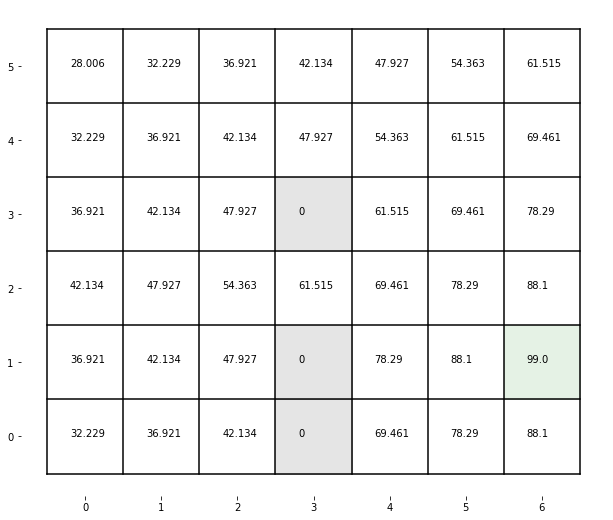

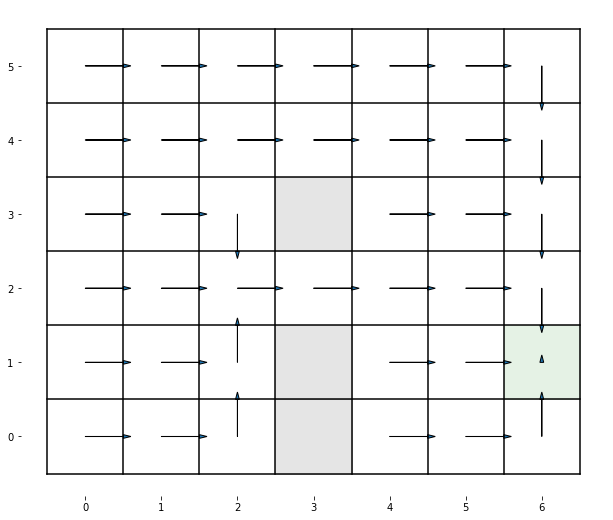

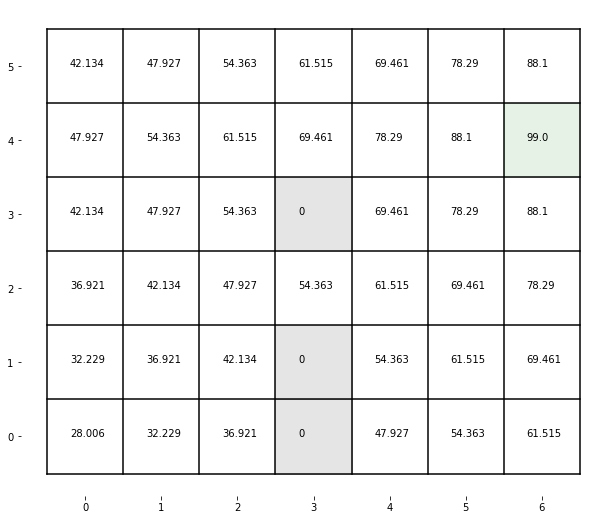

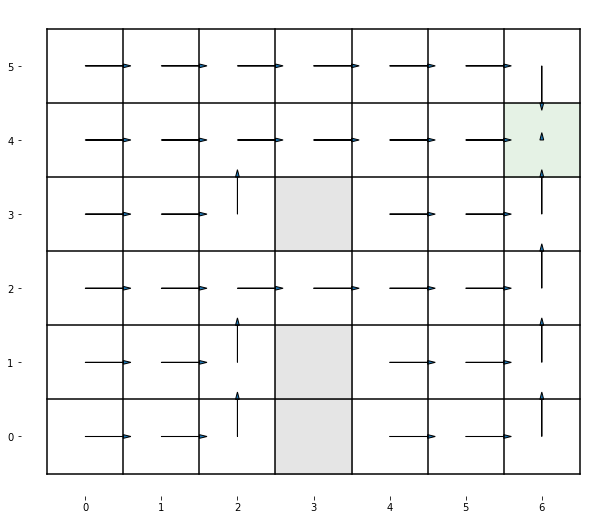

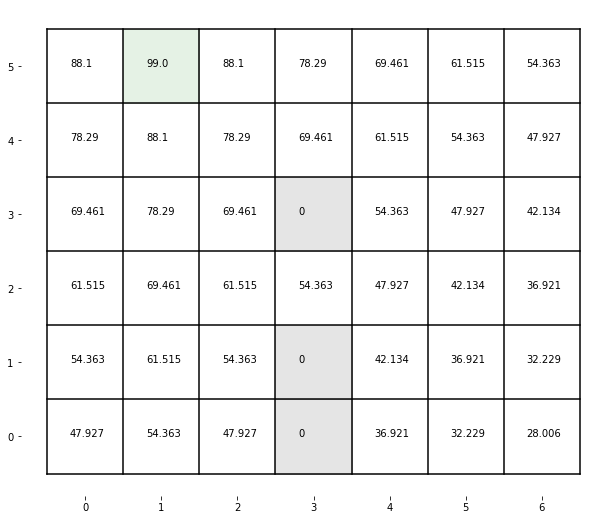

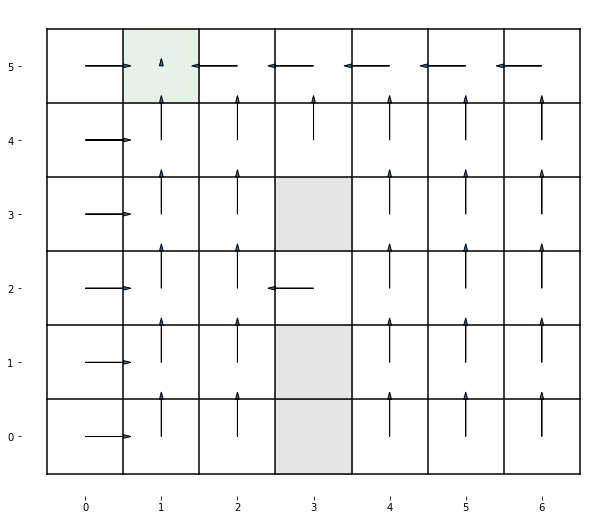

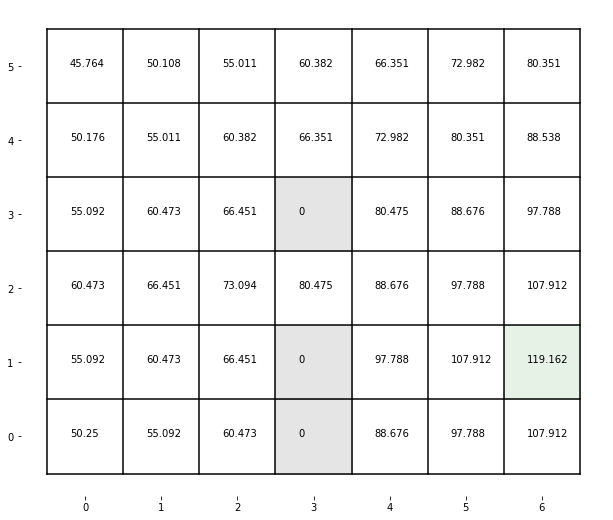

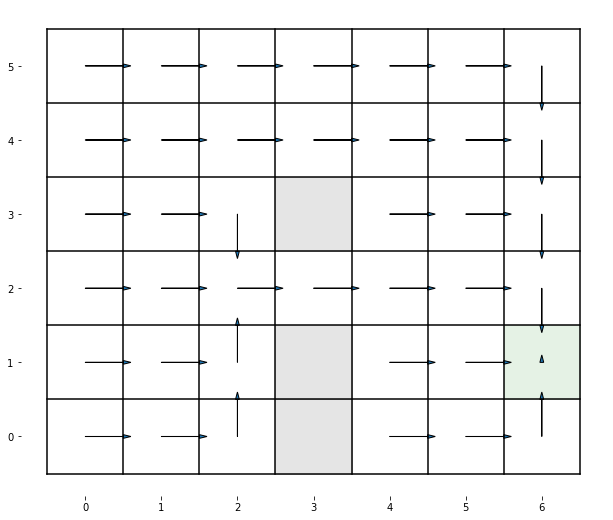

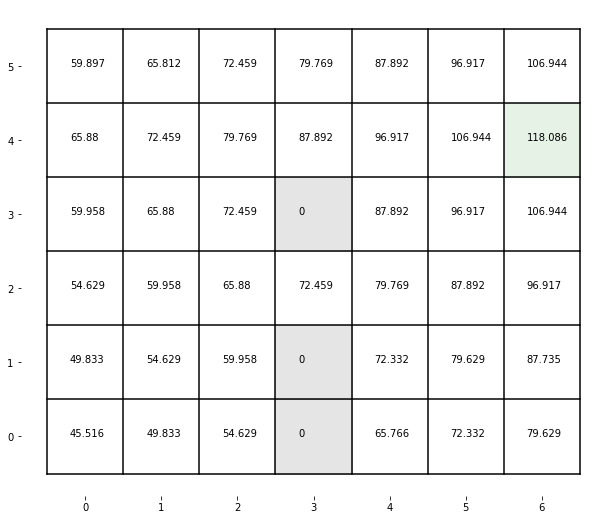

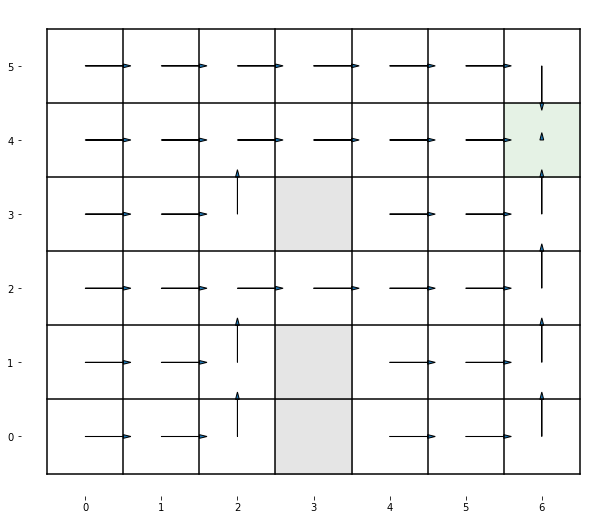

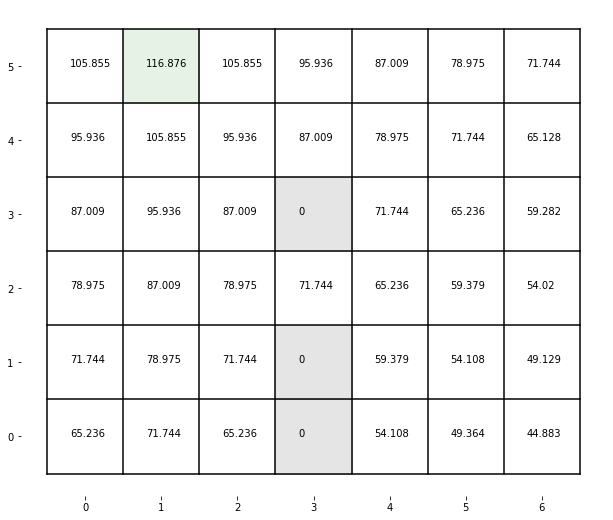

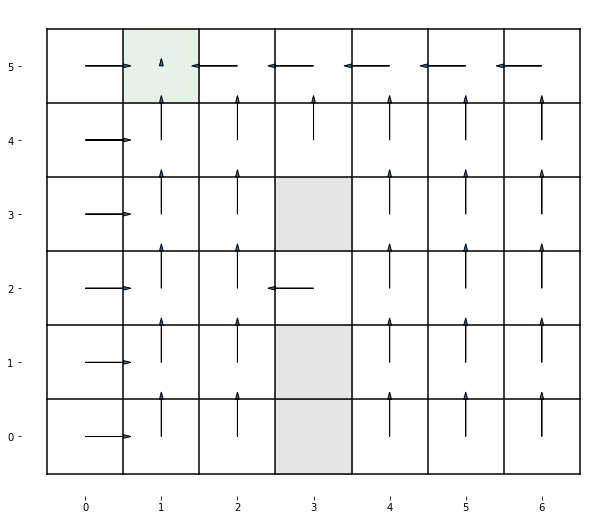

In [69]:

"""
Class: Stat232C
Project 4: Signaling Policy
Name: Mingjia Yao
Date: May 14, 2020

Goal:   return the new reward function
        get a policy that reflects signaling to an observer for each possible true goal in the environment.
        visualize the policy as before by providing graphs of the value table and policy
        write a brief commentary on what has changed between the original goal policies and the new signaling policies.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy
import math

class ValueIteration(object):
    def __init__(self, transitionTable, rewardTable, valueTable, convergenceTolerance, gamma):
        self.transitionTable = transitionTable
        self.rewardTable  = rewardTable
        self.valueTable = valueTable
        self.convergenceTolerance = convergenceTolerance
        self.gamma = gamma

    def __call__(self):
        ValueTable=self.valueTable
        tempValueTable=copy.copy(ValueTable)
        delta=1
        while delta >= self.convergenceTolerance:
            delta=0
            for s in ValueTable:
                v=ValueTable[s]
                lib_s=self.transitionTable[s]
                max_a =0
                for a in lib_s:
                    sum_sr=0
                    lib_a=lib_s[a]
                    for ns in lib_a:
                        sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*tempValueTable[ns])
                    max_a=max(max_a,sum_sr)
                ValueTable[s]=max_a
                delta=max(delta,abs(v-ValueTable[s]))
            tempValueTable=copy.copy(ValueTable)
        policyTable={}
        for s in ValueTable:
            lib_s=self.transitionTable[s]
            pi_s=(0,0)
            vs=0
            prob_ns=0
            for a in lib_s:
                sum_sr=0
                lib_a=lib_s[a]
                for ns in lib_a:
                    sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*ValueTable[ns])
                if sum_sr>vs:
                    pi_s=a
                    vs=sum_sr
                    pi_ns=(0,0)
                    v_ns=0
                    for ns in lib_a:
                        if ValueTable[ns]>v_ns:
                            pi_ns=ns
                            v_ns=ValueTable[ns]
                            prob_ns=lib_a[ns]
            policyTable[s]={pi_s:prob_ns}
            
        return ([ValueTable, policyTable])

class GetLikelihoodReward(object):
    def __init__(self, transitionTable, goalPolicies, valueTables,rewardTables):
        self.transitionTable = copy.copy(transitionTable)
        self.rewardTables = copy.copy(rewardTables)
        self.valueTables = copy.copy(valueTables)
        self.goalPolicies  = copy.copy(goalPolicies) #can be dictionary of form goal:goal policy or a list, but trueGoal should link to the correct policy here
        self.gamma = .9
        self.beta = 2
        
    def __call__(self, trueGoal, originalReward, alpha):
        newReward = copy.deepcopy(originalReward)
        goalList = ['A','B','C']
        
        for coord in self.goalPolicies[trueGoal]:
            act=list(self.goalPolicies[trueGoal][coord].keys())[0]
            next_coord=list(self.transitionTable[coord][act].keys())[0]
            p_gtrue=p_stn_st(coord,next_coord,self.beta,self.gamma,self.transitionTable,self.rewardTables[trueGoal],self.valueTables[trueGoal])
            p_sum=0
            for goal in goalList:
                p_sum=p_sum+p_stn_st(coord,next_coord,self.beta,self.gamma,self.transitionTable,self.rewardTables[goal],self.valueTables[goal])
            r_info=p_gtrue/p_sum
            newReward[coord][act][next_coord]=newReward[coord][act][next_coord]+alpha*r_info
            
        return(newReward)

def p_stn_st(st,stn,beta,gamma,transitTable,rewardTable,valueTable):
    lib_s=transitTable[st]
    p=0
    for at in lib_s:
        if stn in lib_s[at]:
            p=p+lib_s[at][stn]*pias(st,at,beta,gamma,transitTable,rewardTable,valueTable)
    return p

def pias(st,at,beta,gamma,transitTable,rewardTable,valueTable):
    return beta*q(st,at,gamma,transitTable,rewardTable,valueTable)

def q(st,at,gamma,transitTable,rewardTable,valueTable):
    lib_sa=transitTable[st][at]
    q=0
    for ns in lib_sa:
        q=q+lib_sa[ns]*(rewardTable[st][at][ns]+gamma*valueTable[ns])
    return q

def visualizeValueTable(gridWidth, gridHeight, goalState, trapStates, valueTable):
    gridAdjust = .5
    gridScale = 1.5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()


def visualizePolicy(gridWidth, gridHeight, goalState, trapStates, policy):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()  
    
"""
	Environment specifications
	gridWidth = 7
	gridHeight = 6
	allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
	trapStates = [(3,0), (3,1), (3,3)]
	goalA = (6,1)
	goalB = (6,4)
	goalC = (1,5)
"""

transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(0, 0): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(0, 0): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(0, 0): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(0, 0): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 1): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(0, 0): {(1, 2): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(0, 0): {(1, 3): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(0, 0): {(1, 4): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(0, 0): {(1, 5): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 1): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(0, 0): {(2, 2): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(0, 0): {(2, 3): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(0, 0): {(2, 4): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(0, 0): {(2, 5): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 1): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(0, 0): {(3, 2): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(0, 0): {(3, 3): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(0, 0): {(3, 4): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(0, 0): {(3, 5): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 1): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(0, 0): {(4, 2): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(0, 0): {(4, 3): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(0, 0): {(4, 4): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(0, 0): {(4, 5): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 1): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(0, 0): {(5, 2): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(0, 0): {(5, 3): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(0, 0): {(5, 4): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(0, 0): {(5, 5): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 1): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(0, 0): {(6, 2): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(0, 0): {(6, 3): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(0, 0): {(6, 4): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(0, 0): {(6, 5): 1}}}
rewardForGoalA = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): 9},(0, 1): {(6, 2): 9},(-1, 0): {(5, 1): 9},(0, -1): {(6, 0): 9},(0, 0): {(6, 1): 9.9}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardForGoalB = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): 9},(0, 1): {(6, 5): 9},(-1, 0): {(5, 4): 9},(0, -1): {(6, 3): 9},(0, 0): {(6, 4): 9.9}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardForGoalC = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): 9},(0, 1): {(1, 5): 9},(-1, 0): {(0, 5): 9},(0, -1): {(1, 4): 9},(0, 0): {(1, 5): 9.9}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}

def main():
    # Parameters across all goals and environments
    convergenceThreshold = 10e-7
    gamma = .9
    beta = 2
    alpha = 5
    goalA = (6,1)
    goalB = (6,4)
    goalC = (1,5)
    transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(0, 0): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(0, 0): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(0, 0): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(0, 0): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 1): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(0, 0): {(1, 2): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(0, 0): {(1, 3): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(0, 0): {(1, 4): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(0, 0): {(1, 5): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 1): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(0, 0): {(2, 2): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(0, 0): {(2, 3): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(0, 0): {(2, 4): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(0, 0): {(2, 5): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 1): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(0, 0): {(3, 2): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(0, 0): {(3, 3): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(0, 0): {(3, 4): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(0, 0): {(3, 5): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 1): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(0, 0): {(4, 2): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(0, 0): {(4, 3): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(0, 0): {(4, 4): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(0, 0): {(4, 5): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 1): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(0, 0): {(5, 2): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(0, 0): {(5, 3): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(0, 0): {(5, 4): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(0, 0): {(5, 5): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 1): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(0, 0): {(6, 2): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(0, 0): {(6, 3): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(0, 0): {(6, 4): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(0, 0): {(6, 5): 1}}}
    rewardForGoalA = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): 9},(0, 1): {(6, 2): 9},(-1, 0): {(5, 1): 9},(0, -1): {(6, 0): 9},(0, 0): {(6, 1): 9.9}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    rewardForGoalB = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): 9},(0, 1): {(6, 5): 9},(-1, 0): {(5, 4): 9},(0, -1): {(6, 3): 9},(0, 0): {(6, 4): 9.9}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    rewardForGoalC = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): 9},(0, 1): {(1, 5): 9},(-1, 0): {(0, 5): 9},(0, -1): {(1, 4): 9},(0, 0): {(1, 5): 9.9}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    valueTable = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(0, 4): 0,(0, 5): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(1, 4): 0,(1, 5): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(2, 4): 0,(2, 5): 0,(3, 0): 0,(3, 1): 0,(3, 2): 0,(3, 3): 0,(3, 4): 0,(3, 5): 0,(4, 0): 0,(4, 1): 0,(4, 2): 0,(4, 3): 0,(4, 4): 0,(4, 5): 0,(5, 0): 0,(5, 1): 0,(5, 2): 0,(5, 3): 0,(5, 4): 0,(5, 5): 0,(6, 0): 0,(6, 1): 0,(6, 2): 0,(6, 3): 0,(6, 4): 0,(6, 5): 0}

    #goal A
    performValueIteration = ValueIteration(transition, rewardForGoalA, valueTable, convergenceThreshold, gamma)
    optimalValuesA, policyTableA = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesA)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableA)
    
    #goal B
    performValueIteration = ValueIteration(transition, rewardForGoalB, valueTable, convergenceThreshold, gamma)
    optimalValuesB, policyTableB = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesB)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableB)
    
    #goal C
    performValueIteration = ValueIteration(transition, rewardForGoalC, valueTable, convergenceThreshold, gamma)
    optimalValuesC, policyTableC = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesC)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableC)
    
    rewardTables={'A':rewardForGoalA,'B':rewardForGoalB,'C':rewardForGoalC}
    valueTables={'A':optimalValuesA,'B':optimalValuesB,'C':optimalValuesC}
    goalPolicies={'A':policyTableA,'B':policyTableB,'C':policyTableC}
    
    getLikelihoodReward=GetLikelihoodReward(transition, goalPolicies, valueTables,rewardTables)
    newRewardA=getLikelihoodReward('A', rewardForGoalA, alpha)
    newRewardB=getLikelihoodReward('B', rewardForGoalB, alpha)
    newRewardC=getLikelihoodReward('C', rewardForGoalC, alpha)
    
    #new goal A
    performValueIteration = ValueIteration(transition, newRewardA, valueTable, convergenceThreshold, gamma)
    optimalValuesA, policyTableA = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesA)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableA)
    
    #new goal B
    performValueIteration = ValueIteration(transition, newRewardB, valueTable, convergenceThreshold, gamma)
    optimalValuesB, policyTableB = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesB)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableB)
    
    #new goal C
    performValueIteration = ValueIteration(transition, newRewardC, valueTable, convergenceThreshold, gamma)
    optimalValuesC, policyTableC = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesC)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableC)
    
    
if __name__ == '__main__':
    main()

In [33]:
policyTableC

NameError: name 'policyTableC' is not defined

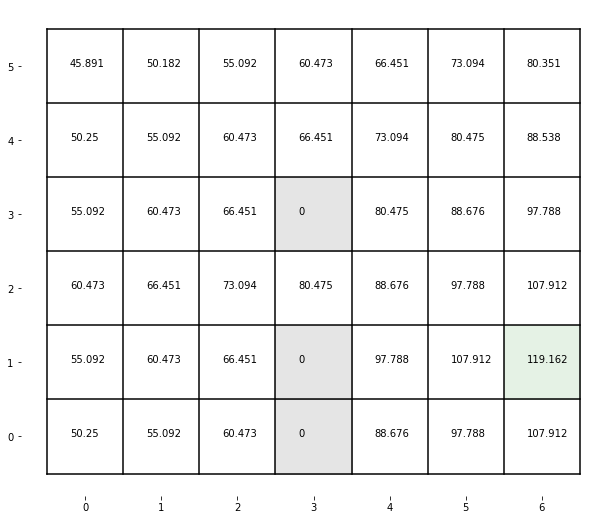

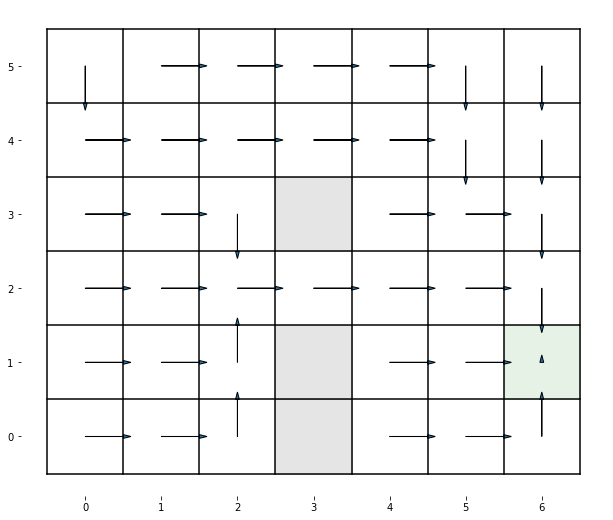

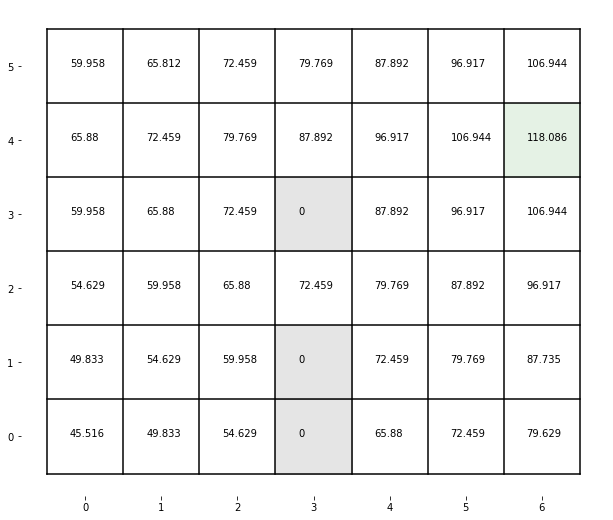

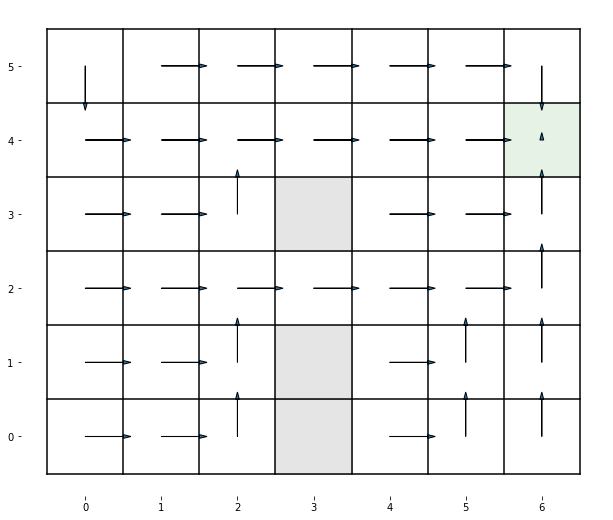

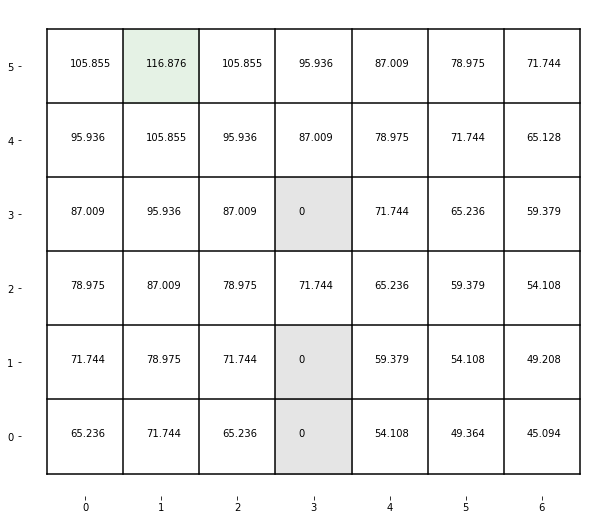

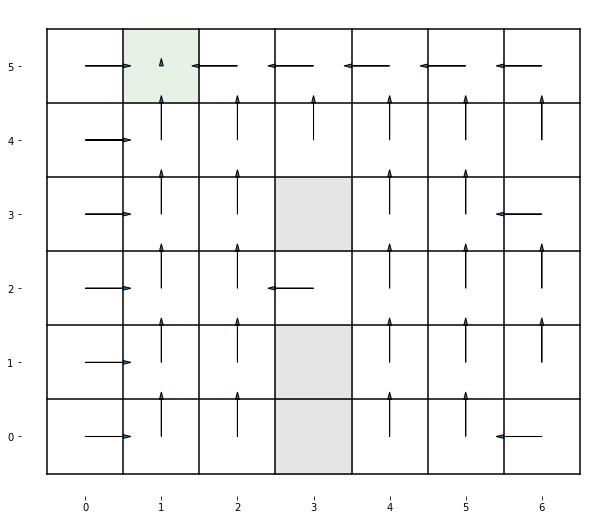

In [81]:
"""
Class: Stat232C
Project 4: Signaling Policy
Name: Mingjia Yao
Date: June 19, 2020

Goal:   return the new reward function
        get a policy that reflects signaling to an observer for each possible true goal in the environment.
        visualize the policy as before by providing graphs of the value table and policy
        write a brief commentary on what has changed between the original goal policies and the new signaling policies.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import copy
import math

class ValueIteration(object):
    def __init__(self, transitionTable, rewardTable, valueTable, convergenceTolerance, gamma):
        self.transitionTable = transitionTable
        self.rewardTable  = rewardTable
        self.valueTable = valueTable
        self.convergenceTolerance = convergenceTolerance
        self.gamma = gamma

    def __call__(self):
        ValueTable=self.valueTable
        tempValueTable=copy.copy(ValueTable)
        delta=1
        while delta >= self.convergenceTolerance:
            delta=0
            for s in ValueTable:
                v=ValueTable[s]
                lib_s=self.transitionTable[s]
                max_a =0
                for a in lib_s:
                    sum_sr=0
                    lib_a=lib_s[a]
                    for ns in lib_a:
                        sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*tempValueTable[ns])
                    max_a=max(max_a,sum_sr)
                ValueTable[s]=max_a
                delta=max(delta,abs(v-ValueTable[s]))
            tempValueTable=copy.copy(ValueTable)
        policyTable={}
        for s in ValueTable:
            lib_s=self.transitionTable[s]
            pi_s=(0,0)
            vs=0
            prob_ns=0
            for a in lib_s:
                sum_sr=0
                lib_a=lib_s[a]
                for ns in lib_a:
                    sum_sr=sum_sr+lib_a[ns]*(self.rewardTable[s][a][ns]+self.gamma*ValueTable[ns])
                if sum_sr>vs:
                    pi_s=a
                    vs=sum_sr
                    pi_ns=(0,0)
                    v_ns=0
                    for ns in lib_a:
                        if ValueTable[ns]>v_ns:
                            pi_ns=ns
                            v_ns=ValueTable[ns]
                            prob_ns=lib_a[ns]
            policyTable[s]={pi_s:prob_ns}
            
        return ([ValueTable, policyTable])

class GetLikelihoodReward(object):
    def __init__(self, transitionTable, goalPolicies, valueTables,rewardTables):
        self.transitionTable = copy.copy(transitionTable)
        self.rewardTables = copy.copy(rewardTables)
        self.valueTables = copy.copy(valueTables)
        self.goalPolicies  = copy.copy(goalPolicies) #can be dictionary of form goal:goal policy or a list, but trueGoal should link to the correct policy here
        self.gamma = .9
        self.beta = 2
        
    def __call__(self, trueGoal, originalReward, alpha):
        newReward = copy.deepcopy(originalReward)
        goalList = ['A','B','C']
        
        for coord in originalReward:
            for act in originalReward[coord]:
                next_coord=list(originalReward[coord][act].keys())[0]
                p_gtrue=p_stn_st(coord,next_coord,self.beta,self.gamma,self.transitionTable,self.rewardTables[trueGoal],self.valueTables[trueGoal])
                p_sum=0
                for goal in goalList:
                    p_sum=p_sum+p_stn_st(coord,next_coord,self.beta,self.gamma,self.transitionTable,self.rewardTables[goal],self.valueTables[goal])
                r_info=p_gtrue/p_sum
                newReward[coord][act][next_coord]=newReward[coord][act][next_coord]+alpha*r_info
            
        return(newReward)

def p_stn_st(st,stn,beta,gamma,transitTable,rewardTable,valueTable):
    lib_s=transitTable[st]
    p=0
    for at in lib_s:
        if stn in lib_s[at]:
            p=p+lib_s[at][stn]*pias(st,at,beta,gamma,transitTable,rewardTable,valueTable)
    return p

def pias(st,at,beta,gamma,transitTable,rewardTable,valueTable):
    return beta*q(st,at,gamma,transitTable,rewardTable,valueTable)

def q(st,at,gamma,transitTable,rewardTable,valueTable):
    lib_sa=transitTable[st][at]
    q=0
    for ns in lib_sa:
        q=q+lib_sa[ns]*(rewardTable[st][at][ns]+gamma*valueTable[ns])
    return q

def visualizeValueTable(gridWidth, gridHeight, goalState, trapStates, valueTable):
    gridAdjust = .5
    gridScale = 1.5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))
    
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), val in valueTable.items():
        plt.text(statex-.2, statey, str(round(val, 3)))    

    plt.show()


def visualizePolicy(gridWidth, gridHeight, goalState, trapStates, policy):
    #grid height/width
    gridAdjust = .5
    gridScale = 1.5
    arrowScale = .5
    
    xs = np.linspace(-gridAdjust, gridWidth-gridAdjust, gridWidth+1)
    ys = np.linspace(-gridAdjust, gridHeight-gridAdjust, gridHeight+1)
    
    plt.rcParams["figure.figsize"] = [gridWidth*gridScale,gridHeight*gridScale]
    ax = plt.gca(frameon=False, xticks = range(gridWidth), yticks = range(gridHeight))

    #goal and trap coloring 
    ax.add_patch(Rectangle((goalState[0]-gridAdjust, goalState[1]-gridAdjust), 1, 1, fill=True, color='green', alpha=.1))
    
    for (trapx, trapy) in trapStates:
        ax.add_patch(Rectangle((trapx-gridAdjust, trapy-gridAdjust), 1, 1, fill=True, color='black', alpha=.1))

    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color = "black")
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color = "black")

    #labeled values
    for (statex, statey), actionDict in policy.items():
        for (optimalActionX, optimalActionY), actionProb in actionDict.items():
            plt.arrow(statex, statey, optimalActionX*actionProb*arrowScale, optimalActionY*actionProb*arrowScale, head_width=0.05*actionProb, head_length=0.1*actionProb)    

    plt.show()  
    
"""
	Environment specifications
	gridWidth = 7
	gridHeight = 6
	allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
	trapStates = [(3,0), (3,1), (3,3)]
	goalA = (6,1)
	goalB = (6,4)
	goalC = (1,5)
"""

transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(0, 0): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(0, 0): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(0, 0): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(0, 0): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 1): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(0, 0): {(1, 2): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(0, 0): {(1, 3): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(0, 0): {(1, 4): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(0, 0): {(1, 5): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 1): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(0, 0): {(2, 2): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(0, 0): {(2, 3): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(0, 0): {(2, 4): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(0, 0): {(2, 5): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 1): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(0, 0): {(3, 2): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(0, 0): {(3, 3): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(0, 0): {(3, 4): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(0, 0): {(3, 5): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 1): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(0, 0): {(4, 2): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(0, 0): {(4, 3): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(0, 0): {(4, 4): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(0, 0): {(4, 5): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 1): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(0, 0): {(5, 2): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(0, 0): {(5, 3): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(0, 0): {(5, 4): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(0, 0): {(5, 5): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 1): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(0, 0): {(6, 2): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(0, 0): {(6, 3): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(0, 0): {(6, 4): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(0, 0): {(6, 5): 1}}}
rewardForGoalA = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): 9},(0, 1): {(6, 2): 9},(-1, 0): {(5, 1): 9},(0, -1): {(6, 0): 9},(0, 0): {(6, 1): 9.9}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardForGoalB = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): 9},(0, 1): {(6, 5): 9},(-1, 0): {(5, 4): 9},(0, -1): {(6, 3): 9},(0, 0): {(6, 4): 9.9}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
rewardForGoalC = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): 9},(0, 1): {(1, 5): 9},(-1, 0): {(0, 5): 9},(0, -1): {(1, 4): 9},(0, 0): {(1, 5): 9.9}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}

def main():
    # Parameters across all goals and environments
    convergenceThreshold = 10e-7
    gamma = .9
    beta = 2
    alpha = 5
    goalA = (6,1)
    goalB = (6,4)
    goalC = (1,5)
    transition = {(0, 0): {(1, 0): {(1, 0): 1},(0, 1): {(0, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 0): 1}},(0, 1): {(1, 0): {(1, 1): 1},(0, 1): {(0, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(0, 0): 1},(0, 0): {(0, 1): 1}},(0, 2): {(1, 0): {(1, 2): 1},(0, 1): {(0, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(0, 1): 1},(0, 0): {(0, 2): 1}},(0, 3): {(1, 0): {(1, 3): 1},(0, 1): {(0, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(0, 2): 1},(0, 0): {(0, 3): 1}},(0, 4): {(1, 0): {(1, 4): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(0, 3): 1},(0, 0): {(0, 4): 1}},(0, 5): {(1, 0): {(1, 5): 1},(0, 1): {(0, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(0, 4): 1},(0, 0): {(0, 5): 1}},(1, 0): {(1, 0): {(2, 0): 1},(0, 1): {(1, 1): 1},(-1, 0): {(0, 0): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 0): 1}},(1, 1): {(1, 0): {(2, 1): 1},(0, 1): {(1, 2): 1},(-1, 0): {(0, 1): 1},(0, -1): {(1, 0): 1},(0, 0): {(1, 1): 1}},(1, 2): {(1, 0): {(2, 2): 1},(0, 1): {(1, 3): 1},(-1, 0): {(0, 2): 1},(0, -1): {(1, 1): 1},(0, 0): {(1, 2): 1}},(1, 3): {(1, 0): {(2, 3): 1},(0, 1): {(1, 4): 1},(-1, 0): {(0, 3): 1},(0, -1): {(1, 2): 1},(0, 0): {(1, 3): 1}},(1, 4): {(1, 0): {(2, 4): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 4): 1},(0, -1): {(1, 3): 1},(0, 0): {(1, 4): 1}},(1, 5): {(1, 0): {(2, 5): 1},(0, 1): {(1, 5): 1},(-1, 0): {(0, 5): 1},(0, -1): {(1, 4): 1},(0, 0): {(1, 5): 1}},(2, 0): {(1, 0): {(3, 0): 1},(0, 1): {(2, 1): 1},(-1, 0): {(1, 0): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 0): 1}},(2, 1): {(1, 0): {(3, 1): 1},(0, 1): {(2, 2): 1},(-1, 0): {(1, 1): 1},(0, -1): {(2, 0): 1},(0, 0): {(2, 1): 1}},(2, 2): {(1, 0): {(3, 2): 1},(0, 1): {(2, 3): 1},(-1, 0): {(1, 2): 1},(0, -1): {(2, 1): 1},(0, 0): {(2, 2): 1}},(2, 3): {(1, 0): {(3, 3): 1},(0, 1): {(2, 4): 1},(-1, 0): {(1, 3): 1},(0, -1): {(2, 2): 1},(0, 0): {(2, 3): 1}},(2, 4): {(1, 0): {(3, 4): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 4): 1},(0, -1): {(2, 3): 1},(0, 0): {(2, 4): 1}},(2, 5): {(1, 0): {(3, 5): 1},(0, 1): {(2, 5): 1},(-1, 0): {(1, 5): 1},(0, -1): {(2, 4): 1},(0, 0): {(2, 5): 1}},(3, 0): {(1, 0): {(4, 0): 1},(0, 1): {(3, 1): 1},(-1, 0): {(2, 0): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 0): 1}},(3, 1): {(1, 0): {(4, 1): 1},(0, 1): {(3, 2): 1},(-1, 0): {(2, 1): 1},(0, -1): {(3, 0): 1},(0, 0): {(3, 1): 1}},(3, 2): {(1, 0): {(4, 2): 1},(0, 1): {(3, 3): 1},(-1, 0): {(2, 2): 1},(0, -1): {(3, 1): 1},(0, 0): {(3, 2): 1}},(3, 3): {(1, 0): {(4, 3): 1},(0, 1): {(3, 4): 1},(-1, 0): {(2, 3): 1},(0, -1): {(3, 2): 1},(0, 0): {(3, 3): 1}},(3, 4): {(1, 0): {(4, 4): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 4): 1},(0, -1): {(3, 3): 1},(0, 0): {(3, 4): 1}},(3, 5): {(1, 0): {(4, 5): 1},(0, 1): {(3, 5): 1},(-1, 0): {(2, 5): 1},(0, -1): {(3, 4): 1},(0, 0): {(3, 5): 1}},(4, 0): {(1, 0): {(5, 0): 1},(0, 1): {(4, 1): 1},(-1, 0): {(3, 0): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 0): 1}},(4, 1): {(1, 0): {(5, 1): 1},(0, 1): {(4, 2): 1},(-1, 0): {(3, 1): 1},(0, -1): {(4, 0): 1},(0, 0): {(4, 1): 1}},(4, 2): {(1, 0): {(5, 2): 1},(0, 1): {(4, 3): 1},(-1, 0): {(3, 2): 1},(0, -1): {(4, 1): 1},(0, 0): {(4, 2): 1}},(4, 3): {(1, 0): {(5, 3): 1},(0, 1): {(4, 4): 1},(-1, 0): {(3, 3): 1},(0, -1): {(4, 2): 1},(0, 0): {(4, 3): 1}},(4, 4): {(1, 0): {(5, 4): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 4): 1},(0, -1): {(4, 3): 1},(0, 0): {(4, 4): 1}},(4, 5): {(1, 0): {(5, 5): 1},(0, 1): {(4, 5): 1},(-1, 0): {(3, 5): 1},(0, -1): {(4, 4): 1},(0, 0): {(4, 5): 1}},(5, 0): {(1, 0): {(6, 0): 1},(0, 1): {(5, 1): 1},(-1, 0): {(4, 0): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 0): 1}},(5, 1): {(1, 0): {(6, 1): 1},(0, 1): {(5, 2): 1},(-1, 0): {(4, 1): 1},(0, -1): {(5, 0): 1},(0, 0): {(5, 1): 1}},(5, 2): {(1, 0): {(6, 2): 1},(0, 1): {(5, 3): 1},(-1, 0): {(4, 2): 1},(0, -1): {(5, 1): 1},(0, 0): {(5, 2): 1}},(5, 3): {(1, 0): {(6, 3): 1},(0, 1): {(5, 4): 1},(-1, 0): {(4, 3): 1},(0, -1): {(5, 2): 1},(0, 0): {(5, 3): 1}},(5, 4): {(1, 0): {(6, 4): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 4): 1},(0, -1): {(5, 3): 1},(0, 0): {(5, 4): 1}},(5, 5): {(1, 0): {(6, 5): 1},(0, 1): {(5, 5): 1},(-1, 0): {(4, 5): 1},(0, -1): {(5, 4): 1},(0, 0): {(5, 5): 1}},(6, 0): {(1, 0): {(6, 0): 1},(0, 1): {(6, 1): 1},(-1, 0): {(5, 0): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 0): 1}},(6, 1): {(1, 0): {(6, 1): 1},(0, 1): {(6, 2): 1},(-1, 0): {(5, 1): 1},(0, -1): {(6, 0): 1},(0, 0): {(6, 1): 1}},(6, 2): {(1, 0): {(6, 2): 1},(0, 1): {(6, 3): 1},(-1, 0): {(5, 2): 1},(0, -1): {(6, 1): 1},(0, 0): {(6, 2): 1}},(6, 3): {(1, 0): {(6, 3): 1},(0, 1): {(6, 4): 1},(-1, 0): {(5, 3): 1},(0, -1): {(6, 2): 1},(0, 0): {(6, 3): 1}},(6, 4): {(1, 0): {(6, 4): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 4): 1},(0, -1): {(6, 3): 1},(0, 0): {(6, 4): 1}},(6, 5): {(1, 0): {(6, 5): 1},(0, 1): {(6, 5): 1},(-1, 0): {(5, 5): 1},(0, -1): {(6, 4): 1},(0, 0): {(6, 5): 1}}}
    rewardForGoalA = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): 9},(0, 1): {(6, 2): 9},(-1, 0): {(5, 1): 9},(0, -1): {(6, 0): 9},(0, 0): {(6, 1): 9.9}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    rewardForGoalB = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(1, 4): -1},(0, 0): {(1, 5): -0.1}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): 9},(0, 1): {(6, 5): 9},(-1, 0): {(5, 4): 9},(0, -1): {(6, 3): 9},(0, 0): {(6, 4): 9.9}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    rewardForGoalC = {(0, 0): {(1, 0): {(1, 0): -1},(0, 1): {(0, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 0): -0.1}},(0, 1): {(1, 0): {(1, 1): -1},(0, 1): {(0, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(0, 0): -1},(0, 0): {(0, 1): -0.1}},(0, 2): {(1, 0): {(1, 2): -1},(0, 1): {(0, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(0, 1): -1},(0, 0): {(0, 2): -0.1}},(0, 3): {(1, 0): {(1, 3): -1},(0, 1): {(0, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(0, 2): -1},(0, 0): {(0, 3): -0.1}},(0, 4): {(1, 0): {(1, 4): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(0, 3): -1},(0, 0): {(0, 4): -0.1}},(0, 5): {(1, 0): {(1, 5): -1},(0, 1): {(0, 5): -1},(-1, 0): {(0, 5): -1},(0, -1): {(0, 4): -1},(0, 0): {(0, 5): -0.1}},(1, 0): {(1, 0): {(2, 0): -1},(0, 1): {(1, 1): -1},(-1, 0): {(0, 0): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 0): -0.1}},(1, 1): {(1, 0): {(2, 1): -1},(0, 1): {(1, 2): -1},(-1, 0): {(0, 1): -1},(0, -1): {(1, 0): -1},(0, 0): {(1, 1): -0.1}},(1, 2): {(1, 0): {(2, 2): -1},(0, 1): {(1, 3): -1},(-1, 0): {(0, 2): -1},(0, -1): {(1, 1): -1},(0, 0): {(1, 2): -0.1}},(1, 3): {(1, 0): {(2, 3): -1},(0, 1): {(1, 4): -1},(-1, 0): {(0, 3): -1},(0, -1): {(1, 2): -1},(0, 0): {(1, 3): -0.1}},(1, 4): {(1, 0): {(2, 4): -1},(0, 1): {(1, 5): -1},(-1, 0): {(0, 4): -1},(0, -1): {(1, 3): -1},(0, 0): {(1, 4): -0.1}},(1, 5): {(1, 0): {(2, 5): 9},(0, 1): {(1, 5): 9},(-1, 0): {(0, 5): 9},(0, -1): {(1, 4): 9},(0, 0): {(1, 5): 9.9}},(2, 0): {(1, 0): {(3, 0): -1},(0, 1): {(2, 1): -1},(-1, 0): {(1, 0): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 0): -0.1}},(2, 1): {(1, 0): {(3, 1): -1},(0, 1): {(2, 2): -1},(-1, 0): {(1, 1): -1},(0, -1): {(2, 0): -1},(0, 0): {(2, 1): -0.1}},(2, 2): {(1, 0): {(3, 2): -1},(0, 1): {(2, 3): -1},(-1, 0): {(1, 2): -1},(0, -1): {(2, 1): -1},(0, 0): {(2, 2): -0.1}},(2, 3): {(1, 0): {(3, 3): -1},(0, 1): {(2, 4): -1},(-1, 0): {(1, 3): -1},(0, -1): {(2, 2): -1},(0, 0): {(2, 3): -0.1}},(2, 4): {(1, 0): {(3, 4): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 4): -1},(0, -1): {(2, 3): -1},(0, 0): {(2, 4): -0.1}},(2, 5): {(1, 0): {(3, 5): -1},(0, 1): {(2, 5): -1},(-1, 0): {(1, 5): -1},(0, -1): {(2, 4): -1},(0, 0): {(2, 5): -0.1}},(3, 0): {(1, 0): {(4, 0): -100},(0, 1): {(3, 1): -100},(-1, 0): {(2, 0): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 0): -100}},(3, 1): {(1, 0): {(4, 1): -100},(0, 1): {(3, 2): -100},(-1, 0): {(2, 1): -100},(0, -1): {(3, 0): -100},(0, 0): {(3, 1): -100}},(3, 2): {(1, 0): {(4, 2): -1},(0, 1): {(3, 3): -1},(-1, 0): {(2, 2): -1},(0, -1): {(3, 1): -1},(0, 0): {(3, 2): -0.1}},(3, 3): {(1, 0): {(4, 3): -100},(0, 1): {(3, 4): -100},(-1, 0): {(2, 3): -100},(0, -1): {(3, 2): -100},(0, 0): {(3, 3): -100}},(3, 4): {(1, 0): {(4, 4): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 4): -1},(0, -1): {(3, 3): -1},(0, 0): {(3, 4): -0.1}},(3, 5): {(1, 0): {(4, 5): -1},(0, 1): {(3, 5): -1},(-1, 0): {(2, 5): -1},(0, -1): {(3, 4): -1},(0, 0): {(3, 5): -0.1}},(4, 0): {(1, 0): {(5, 0): -1},(0, 1): {(4, 1): -1},(-1, 0): {(3, 0): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 0): -0.1}},(4, 1): {(1, 0): {(5, 1): -1},(0, 1): {(4, 2): -1},(-1, 0): {(3, 1): -1},(0, -1): {(4, 0): -1},(0, 0): {(4, 1): -0.1}},(4, 2): {(1, 0): {(5, 2): -1},(0, 1): {(4, 3): -1},(-1, 0): {(3, 2): -1},(0, -1): {(4, 1): -1},(0, 0): {(4, 2): -0.1}},(4, 3): {(1, 0): {(5, 3): -1},(0, 1): {(4, 4): -1},(-1, 0): {(3, 3): -1},(0, -1): {(4, 2): -1},(0, 0): {(4, 3): -0.1}},(4, 4): {(1, 0): {(5, 4): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 4): -1},(0, -1): {(4, 3): -1},(0, 0): {(4, 4): -0.1}},(4, 5): {(1, 0): {(5, 5): -1},(0, 1): {(4, 5): -1},(-1, 0): {(3, 5): -1},(0, -1): {(4, 4): -1},(0, 0): {(4, 5): -0.1}},(5, 0): {(1, 0): {(6, 0): -1},(0, 1): {(5, 1): -1},(-1, 0): {(4, 0): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 0): -0.1}},(5, 1): {(1, 0): {(6, 1): -1},(0, 1): {(5, 2): -1},(-1, 0): {(4, 1): -1},(0, -1): {(5, 0): -1},(0, 0): {(5, 1): -0.1}},(5, 2): {(1, 0): {(6, 2): -1},(0, 1): {(5, 3): -1},(-1, 0): {(4, 2): -1},(0, -1): {(5, 1): -1},(0, 0): {(5, 2): -0.1}},(5, 3): {(1, 0): {(6, 3): -1},(0, 1): {(5, 4): -1},(-1, 0): {(4, 3): -1},(0, -1): {(5, 2): -1},(0, 0): {(5, 3): -0.1}},(5, 4): {(1, 0): {(6, 4): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 4): -1},(0, -1): {(5, 3): -1},(0, 0): {(5, 4): -0.1}},(5, 5): {(1, 0): {(6, 5): -1},(0, 1): {(5, 5): -1},(-1, 0): {(4, 5): -1},(0, -1): {(5, 4): -1},(0, 0): {(5, 5): -0.1}},(6, 0): {(1, 0): {(6, 0): -1},(0, 1): {(6, 1): -1},(-1, 0): {(5, 0): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 0): -0.1}},(6, 1): {(1, 0): {(6, 1): -1},(0, 1): {(6, 2): -1},(-1, 0): {(5, 1): -1},(0, -1): {(6, 0): -1},(0, 0): {(6, 1): -0.1}},(6, 2): {(1, 0): {(6, 2): -1},(0, 1): {(6, 3): -1},(-1, 0): {(5, 2): -1},(0, -1): {(6, 1): -1},(0, 0): {(6, 2): -0.1}},(6, 3): {(1, 0): {(6, 3): -1},(0, 1): {(6, 4): -1},(-1, 0): {(5, 3): -1},(0, -1): {(6, 2): -1},(0, 0): {(6, 3): -0.1}},(6, 4): {(1, 0): {(6, 4): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 4): -1},(0, -1): {(6, 3): -1},(0, 0): {(6, 4): -0.1}},(6, 5): {(1, 0): {(6, 5): -1},(0, 1): {(6, 5): -1},(-1, 0): {(5, 5): -1},(0, -1): {(6, 4): -1},(0, 0): {(6, 5): -0.1}}}
    valueTable = {(0, 0): 0,(0, 1): 0,(0, 2): 0,(0, 3): 0,(0, 4): 0,(0, 5): 0,(1, 0): 0,(1, 1): 0,(1, 2): 0,(1, 3): 0,(1, 4): 0,(1, 5): 0,(2, 0): 0,(2, 1): 0,(2, 2): 0,(2, 3): 0,(2, 4): 0,(2, 5): 0,(3, 0): 0,(3, 1): 0,(3, 2): 0,(3, 3): 0,(3, 4): 0,(3, 5): 0,(4, 0): 0,(4, 1): 0,(4, 2): 0,(4, 3): 0,(4, 4): 0,(4, 5): 0,(5, 0): 0,(5, 1): 0,(5, 2): 0,(5, 3): 0,(5, 4): 0,(5, 5): 0,(6, 0): 0,(6, 1): 0,(6, 2): 0,(6, 3): 0,(6, 4): 0,(6, 5): 0}

    #goal A
    performValueIteration = ValueIteration(transition, rewardForGoalA, valueTable, convergenceThreshold, gamma)
    optimalValuesA, policyTableA = performValueIteration()
    #visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesA)
    #visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableA)
    
    #goal B
    performValueIteration = ValueIteration(transition, rewardForGoalB, valueTable, convergenceThreshold, gamma)
    optimalValuesB, policyTableB = performValueIteration()
    #visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesB)
    #visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableB)
    
    #goal C
    performValueIteration = ValueIteration(transition, rewardForGoalC, valueTable, convergenceThreshold, gamma)
    optimalValuesC, policyTableC = performValueIteration()
    #visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesC)
    #visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableC)
    
    rewardTables={'A':rewardForGoalA,'B':rewardForGoalB,'C':rewardForGoalC}
    valueTables={'A':optimalValuesA,'B':optimalValuesB,'C':optimalValuesC}
    goalPolicies={'A':policyTableA,'B':policyTableB,'C':policyTableC}
    
    getLikelihoodReward=GetLikelihoodReward(transition, goalPolicies, valueTables,rewardTables)
    newRewardA=getLikelihoodReward('A', rewardForGoalA, alpha)
    newRewardB=getLikelihoodReward('B', rewardForGoalB, alpha)
    newRewardC=getLikelihoodReward('C', rewardForGoalC, alpha)
    
    #new goal A
    performValueIteration = ValueIteration(transition, newRewardA, valueTable, convergenceThreshold, gamma)
    optimalValuesA, policyTableA = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesA)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalA , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableA)
    
    #new goal B
    performValueIteration = ValueIteration(transition, newRewardB, valueTable, convergenceThreshold, gamma)
    optimalValuesB, policyTableB = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesB)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalB , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableB)
    
    #new goal C
    performValueIteration = ValueIteration(transition, newRewardC, valueTable, convergenceThreshold, gamma)
    optimalValuesC, policyTableC = performValueIteration()
    visualizeValueTable(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)],valueTable=optimalValuesC)
    visualizePolicy(gridWidth=7, gridHeight=6, goalState = goalC , trapStates = [(3,0), (3,1),(3,3)], policy=policyTableC)
    
    
if __name__ == '__main__':
    main()